<a href="https://colab.research.google.com/github/PZhenia/hlegal/blob/main/ML_Lab2_Pravdenko_Yevheniia_KN_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
<font size=6>Лабораторна робота №2 з Машинного навчання <br>
<font size=5>студентки групи КН-31 Правденко Євгенії
</div>

#Завантаження даних

Підключимо потрібні бібліотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Завантажимо наші тренувальні та тестувальні дані з диску:

In [ ]:
train_raw = pd.read_csv("/content/drive/MyDrive/university/ML/application_train.csv")
test_raw = pd.read_csv("/content/drive/MyDrive/university/ML/application_test.csv")

Переглянемо тренувальні дані

In [ ]:
pd.set_option('display.max_columns', None)
print(train_raw.shape)
train_raw.head(10)

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#Обробка даних

Перевіримо дані на кількість та відсоток пропущених значень у кожній колонці

In [ ]:
def clean_missing_values(df: pd.DataFrame, name: str = "Dataset", threshold: float = 30.0):
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100

    summary_df = (
        pd.DataFrame({
            'Missing Count': missing_count,
            'Missing %': missing_percent
        })
        .query('`Missing Count` > 0')
        .sort_values('Missing %', ascending=False)
    )

    features_to_drop = summary_df[
        summary_df['Missing %'] >= threshold
    ].index.tolist()

    cleaned_df = df.drop(columns=features_to_drop)

    print(f"{'-' * 10} Initial number of columns: {df.shape[1]} {'-' * 10}")
    print(f"{'-' * 10} Columns with missing values: {summary_df.shape[0]}"
      f"({summary_df.shape[0]/df.shape[1]*100:.1f}%) {'-' * 10}")
    print(f"{'-' * 10} Columns removed (> {threshold}% missing): {len(features_to_drop)} {'-' * 10}")
    print(f"{'-' * 10} Remaining columns: {cleaned_df.shape[1]} {'-' * 10}")


    return cleaned_df, summary_df


In [ ]:
pd.set_option('display.max_rows', None)
train_cleaned, missing_summary = clean_missing_values(train_raw, name="Train Dataset", threshold=30)

missing_summary

---------- Initial number of columns: 122 ----------
---------- Columns with missing values: 67(54.9%) ----------
---------- Columns removed (> 30% missing): 50 ----------
---------- Remaining columns: 72 ----------


,Missing Count,Missing %
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


Видалимо відповідні фічі й з тестувального набору даних:

In [ ]:
features_to_drop = missing_summary[
    missing_summary['Missing %'] >= 30
].index.tolist()

test_cleaned = test_raw.drop(columns=features_to_drop, errors='ignore')

test_cleaned = test_raw[train_cleaned.columns.intersection(test_raw.columns)]

Наступним кроком видалимо ідентифікатор SK_ID_CURR з обох датасетів, але для тестувальних даних збережемо його окремо:

In [ ]:
test_ids = test_raw["SK_ID_CURR"]

if "SK_ID_CURR" in train_cleaned.columns:
    train_cleaned = train_cleaned.drop(columns=["SK_ID_CURR"])
if "SK_ID_CURR" in test_cleaned.columns:
    test_cleaned = test_cleaned.drop(columns=["SK_ID_CURR"])

Перевіримо тренувальні дані на дублікати

In [ ]:
train_cleaned[train_cleaned.duplicated(keep=False)]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


Як бачимо, дублікатів немає.

#Робота з типами

Після попереднього очищення датасетів залишились лише фічі, які несуть корисну інформацію. Наступним кроком переглянемо їхні типи.

In [ ]:
train_cleaned.dtypes

,0
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64
AMT_GOODS_PRICE,float64


Замінимо всі дані з типом "object" на категоріальний тип.

In [ ]:
def convert_to_category(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df = df.astype({col: "category" for col in df.select_dtypes("object").columns})
    for col in df.columns:
        unique_vals = set(df[col].dropna().unique())
        if unique_vals <= {0, 1} and len(unique_vals) > 0:
            df[col] = df[col].astype("category")

    return df

In [ ]:
train_cleaned = convert_to_category(train_cleaned)
test_cleaned = convert_to_category(test_cleaned)

train_cleaned.dtypes

,0
TARGET,category
NAME_CONTRACT_TYPE,category
CODE_GENDER,category
FLAG_OWN_CAR,category
FLAG_OWN_REALTY,category
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64
AMT_GOODS_PRICE,float64


#Заповнення пропусків

Після очищення даних деякі колонки все ще містять пропуски. Для підготовки датасету до моделювання реалізована функція, яка заповнює пропуски автоматично:

Числові колонки (int, float) – медіаною або середнім.

Категоріальні колонки (object, category) – модою (найпоширенішим значенням).

Функція також формує таблицю з кількістю пропусків до та після заповнення, що дозволяє перевірити ефективність обробки.

In [ ]:
def fill_missing_values(df, numeric_strategy='median', categorical_strategy='mode'):
    df_filled = df.copy()

    missing_before = df.isnull().sum()
    missing_before = missing_before[missing_before > 0]

    numeric_cols = df_filled.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_filled[col].isnull().any():
            if numeric_strategy == 'mean':
                df_filled[col] = df_filled[col].fillna(df_filled[col].mean())
            elif numeric_strategy == 'median':
                df_filled[col] = df_filled[col].fillna(df_filled[col].median())

    categorical_cols = df_filled.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if df_filled[col].isnull().any():
            if categorical_strategy == 'mode':
                df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])

    missing_after = df_filled.isnull().sum()
    filled_info = pd.DataFrame({
        'missing_before': missing_before,
        'missing_after': missing_after[missing_before.index]
    })
    filled_info['filled'] = filled_info['missing_before'] - filled_info['missing_after']

    filled_info = filled_info[filled_info['filled'] > 0].sort_values('filled', ascending=False)

    if not filled_info.empty:
        print("=== Missing values filled ===")
        display(filled_info)
    else:
        print("No missing values found.")

    return df_filled


In [ ]:
data_train = fill_missing_values(train_cleaned)
data_test = fill_missing_values(test_cleaned)

=== Missing values filled ===


,missing_before,missing_after,filled
EXT_SOURCE_3,60965,0,60965
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0,41519
AMT_REQ_CREDIT_BUREAU_MON,41519,0,41519
AMT_REQ_CREDIT_BUREAU_YEAR,41519,0,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519,0,41519
AMT_REQ_CREDIT_BUREAU_HOUR,41519,0,41519
AMT_REQ_CREDIT_BUREAU_DAY,41519,0,41519
NAME_TYPE_SUITE,1292,0,1292
DEF_30_CNT_SOCIAL_CIRCLE,1021,0,1021
DEF_60_CNT_SOCIAL_CIRCLE,1021,0,1021


=== Missing values filled ===


,missing_before,missing_after,filled
EXT_SOURCE_3,8668,0,8668
AMT_REQ_CREDIT_BUREAU_QRT,6049,0,6049
AMT_REQ_CREDIT_BUREAU_WEEK,6049,0,6049
AMT_REQ_CREDIT_BUREAU_MON,6049,0,6049
AMT_REQ_CREDIT_BUREAU_HOUR,6049,0,6049
AMT_REQ_CREDIT_BUREAU_DAY,6049,0,6049
AMT_REQ_CREDIT_BUREAU_YEAR,6049,0,6049
NAME_TYPE_SUITE,911,0,911
OBS_30_CNT_SOCIAL_CIRCLE,29,0,29
DEF_30_CNT_SOCIAL_CIRCLE,29,0,29


#Статистики

Після заповнення пропусків доцільно оцінити основні статистики фіч. Функція робить це автоматично:

Числові колонки – кількість спостережень, середнє, стандартне відхилення, мінімум, максимум, квартилі.

Категоріальні колонки – кількість унікальних значень, найпоширеніше значення та його частка.

Це дозволяє швидко оцінити розподіл та характеристики даних.

In [ ]:
def describe_by_type(df):
    print("Numeric features:")
    display(df.describe())

    print("\nCategorical features:")
    display(df.describe(include=['object', 'category']))

In [ ]:
describe_by_type(data_train)

Numeric features:


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152664,2.052463,2.031521,12.063419,5.145034e-01,0.515695,1.417523,0.142944,1.400626,0.099717,-962.858119,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910679,0.509034,0.502737,3.265832,1.908699e-01,0.174736,2.398395,0.446033,2.377224,0.361735,826.807226,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,6.634218e-01,0.636376,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000



Categorical features:


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,2,3,2,2,7,8,5,6,6,2,2,2,2,2,2,7,2,2,2,2,2,2,58,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,1,1,0,1,0,0,TUESDAY,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,282686,278232,202448,202924,213312,249818,158774,218391,196432,272868,307510,252125,246203,306937,221080,290069,53901,302854,291899,295008,283472,236644,252296,67992,307498,218340,307486,302863,280433,307452,282487,306313,307504,306308,307509,306427,306608,307139,304458,307429,305011,307328,307355,307408


Щоб перевірити, чи заповнення пропусків не спотворило розподіл фіч, використовується функція compare_describe():

Числові колонки – порівнює описові статистики до і після заповнення (середнє, мінімум, максимум, квартилі) та показує змінені колонки.

Категоріальні колонки – порівнює кількість унікальних значень і моду; відображає колонки зі змінами.

In [ ]:

def compare_describe(before_df, after_df):
    desc_before = before_df.describe()
    desc_after = after_df.describe()

    diff = desc_after - desc_before

    diff_nonzero = diff.loc[:, (diff != 0).any(axis=0)]

    print("=== Numeric feature changes after filling missing values ===")
    display(diff_nonzero.round(6))

    cat_before = before_df.select_dtypes(include=['object', 'category'])
    cat_after = after_df.select_dtypes(include=['object', 'category'])

    summary = []
    for col in cat_before.columns:
        if col in cat_after.columns:
            uniques_before = cat_before[col].nunique(dropna=False)
            uniques_after = cat_after[col].nunique(dropna=False)
            mode_before = cat_before[col].mode().iloc[0] if not cat_before[col].mode().empty else None
            mode_after = cat_after[col].mode().iloc[0] if not cat_after[col].mode().empty else None
            if uniques_before != uniques_after or mode_before != mode_after:
                summary.append({
                    'feature': col,
                    'unique_before': uniques_before,
                    'unique_after': uniques_after,
                    'mode_before': mode_before,
                    'mode_after': mode_after
                })

    if summary:
        print("\n=== Categorical feature changes ===")
        display(pd.DataFrame(summary))
    else:
        print("\nNo categorical feature changes detected.")

In [ ]:
compare_describe(train_cleaned,data_train)

=== Numeric feature changes after filling missing values ===


,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,12.000000,278.000000,2.000000,660.000000,60965.000000,1021.000000,1021.000000,1021.000000,1021.000000,1.000000,41519.000000,41519.000000,41519.000000,41519.000000,41519.000000,41519.000000
mean,-0.086068,-79.913062,-0.000001,0.000111,0.004842,-0.004722,-0.000476,-0.004666,-0.000332,0.000669,-0.000864,-0.000945,-0.004639,-0.036103,-0.035843,-0.121511
std,-0.276250,-157.478294,-0.000003,-0.000190,-0.020109,-0.002593,-0.000666,-0.002579,-0.000556,-0.001261,-0.005835,-0.007720,-0.013957,-0.059192,-0.049997,-0.103772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000516,0.046450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,-0.000195,-0.032681,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



=== Categorical feature changes ===


,feature,unique_before,unique_after,mode_before,mode_after
0,NAME_TYPE_SUITE,8,7,Unaccompanied,Unaccompanied


Заповнення пропусків медіаною або модою не сильно вплинуло на розподіл даних.

#Обробка аутлаєрів та побудова графіків

Виконаємо повну візуалізацію всіх залишених ознак у датасеті, щоб оцінити їх розподіли та наявність потенційних аномалій. Для числових колонок будуємо гістограми та boxplot, що дозволяє побачити форму розподілу, наявність викидів і загальні тенденції. Для категоріальних ознак будуємо countplot, щоб оцінити частоти кожної категорії та визначити, чи домінує якась категорія.

In [ ]:
def visualize_features(df):
    # Separate numerical and categorical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

    print(f"Total numerical features: {len(num_cols)}")
    print(f"Total categorical features: {len(cat_cols)}\n")

    # --- Numerical features ---
    for col in num_cols:
        data = df[col].dropna()  # Remove NaNs
        if data.empty:
            continue

        plt.figure(figsize=(10, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data, kde=False, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data, color='lightblue')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # --- Categorical features ---
    for col in cat_cols:
        data = df[col].dropna()  # Remove NaNs
        if data.empty:
            continue

        plt.figure(figsize=(6, 4))
        sns.countplot(
            y=data,
            order=data.value_counts().index,
            color="lightblue",
            hue=None,
            legend=False
        )
        plt.title(f'Count of categories in {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


Total numerical features: 27
Total categorical features: 44



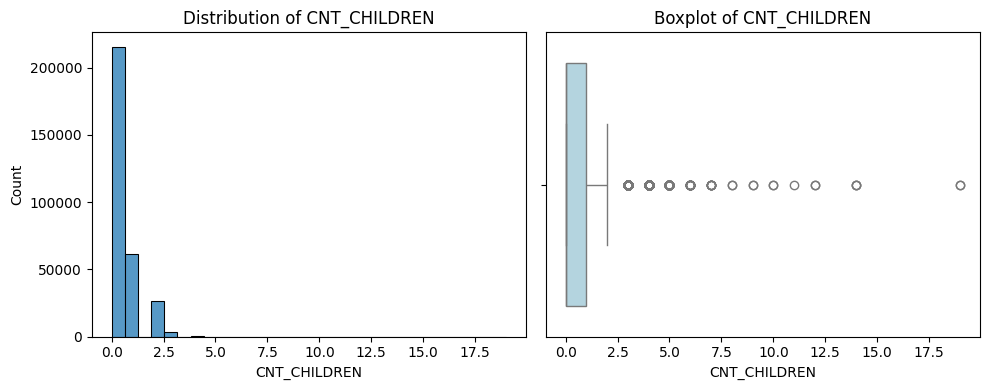

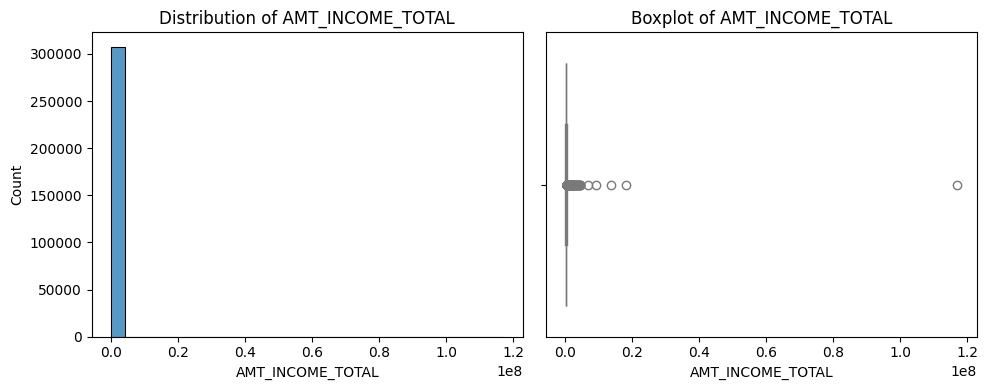

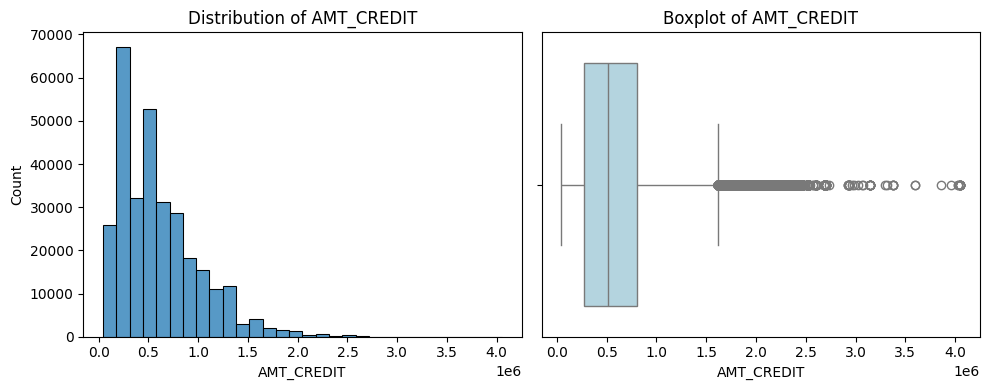

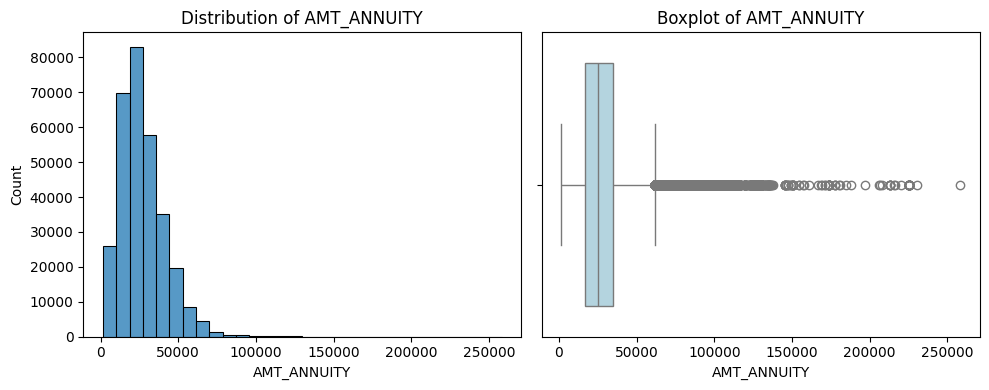

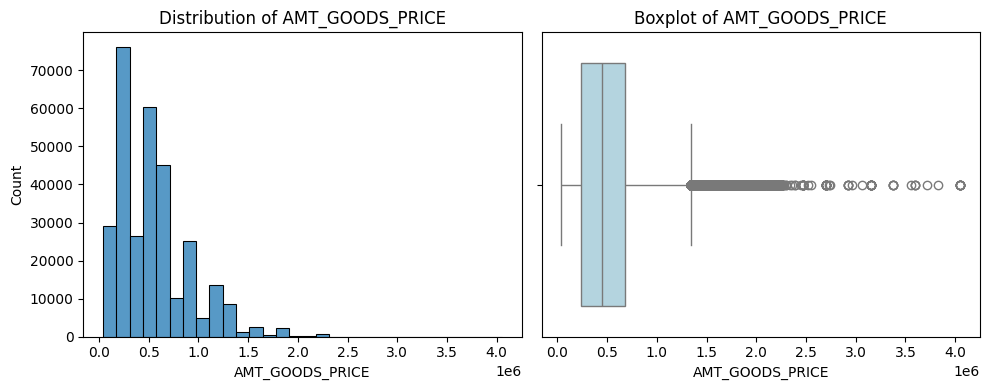

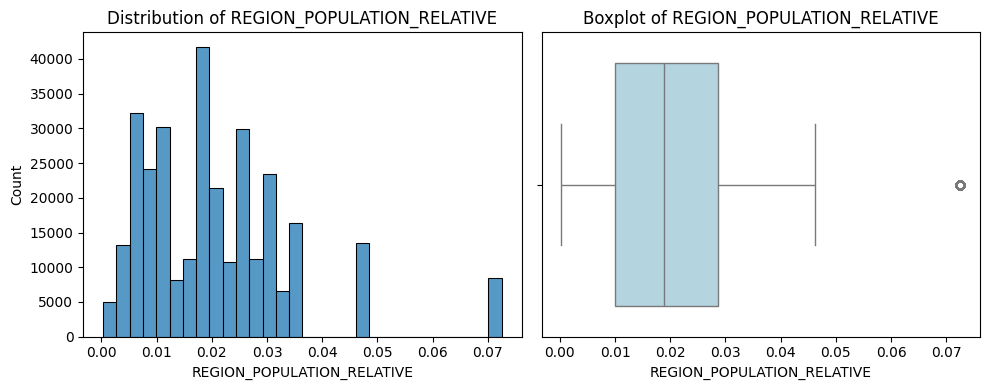

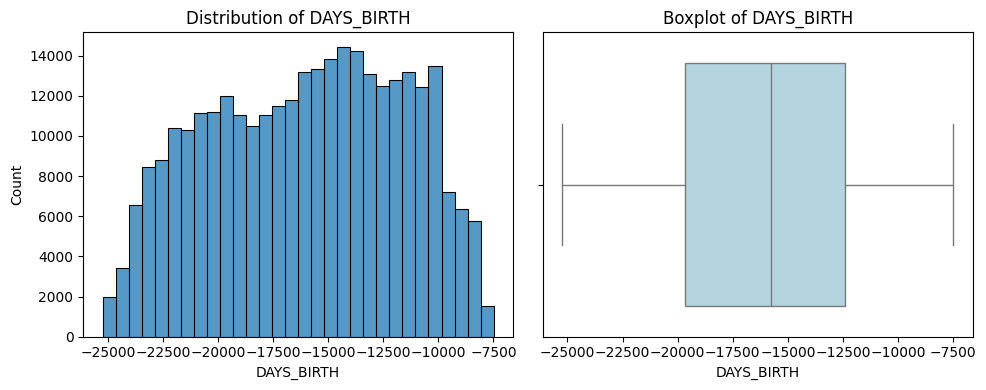

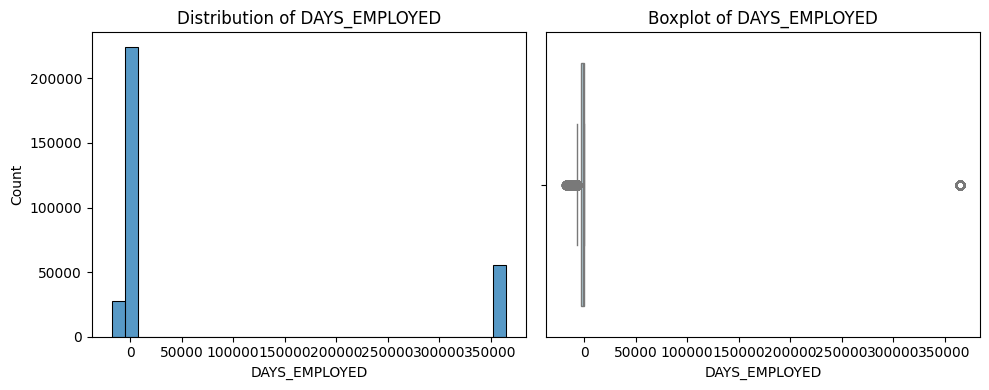

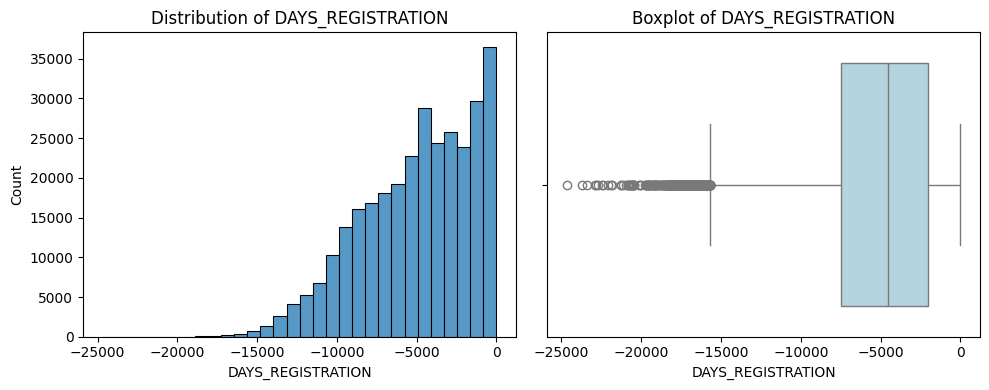

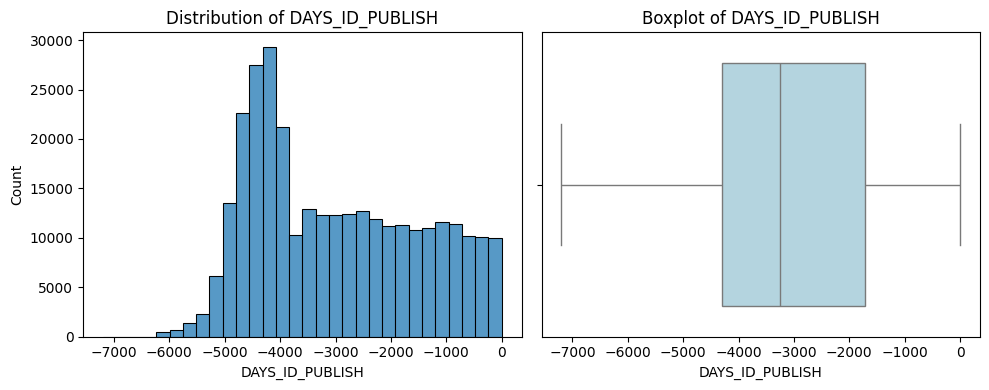

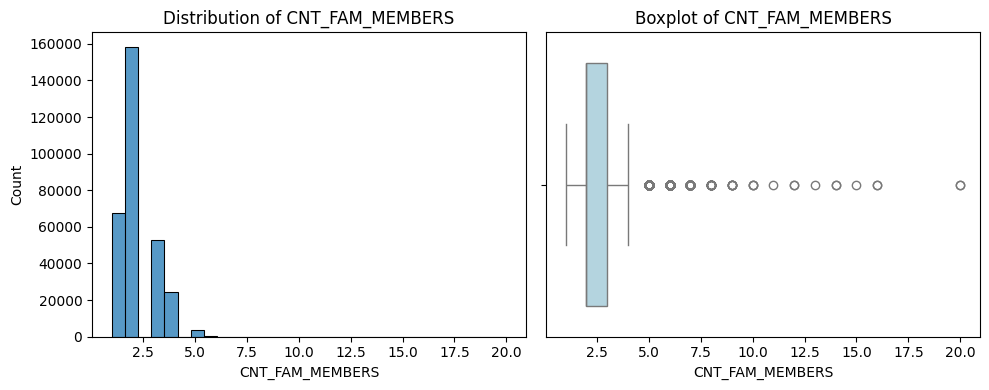

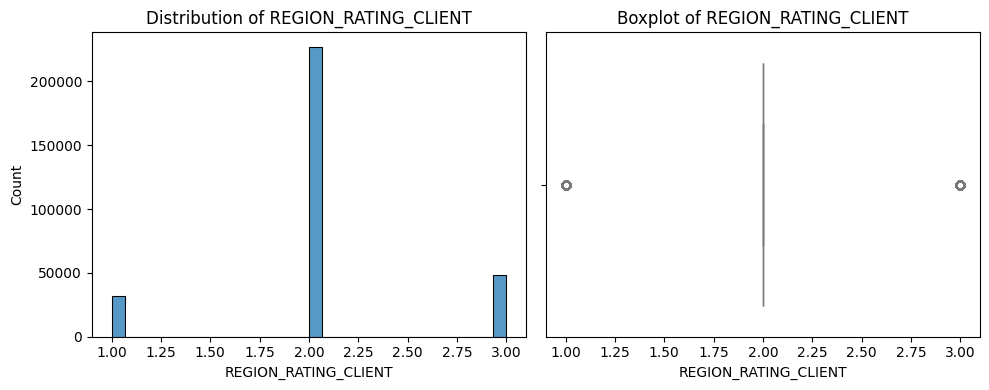

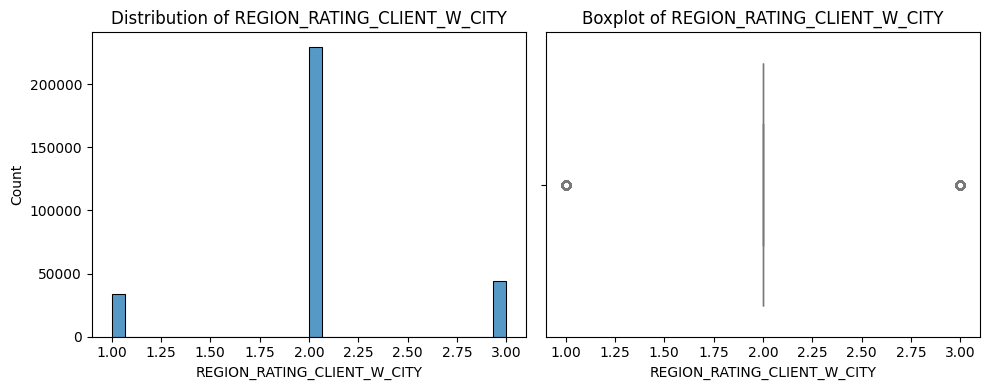

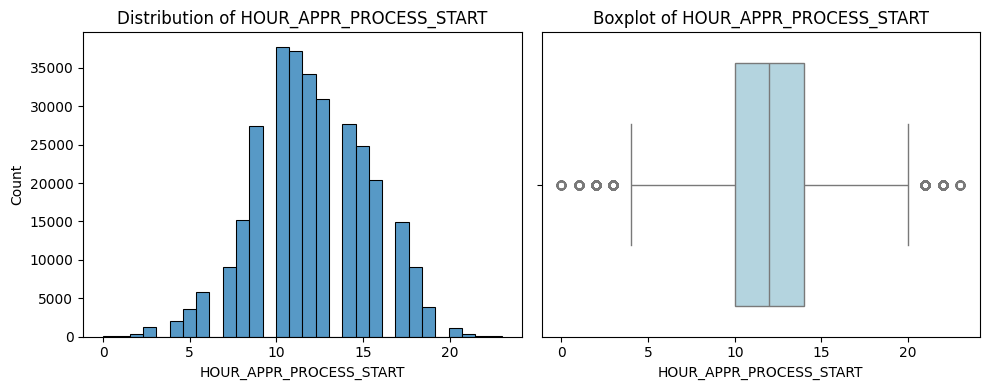

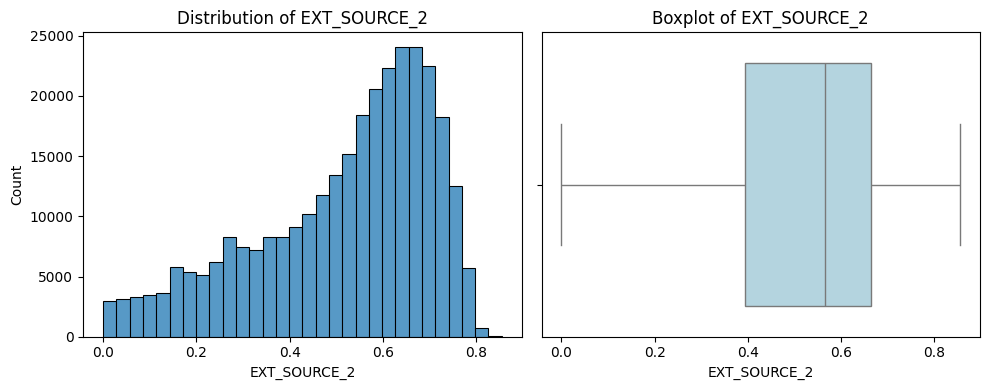

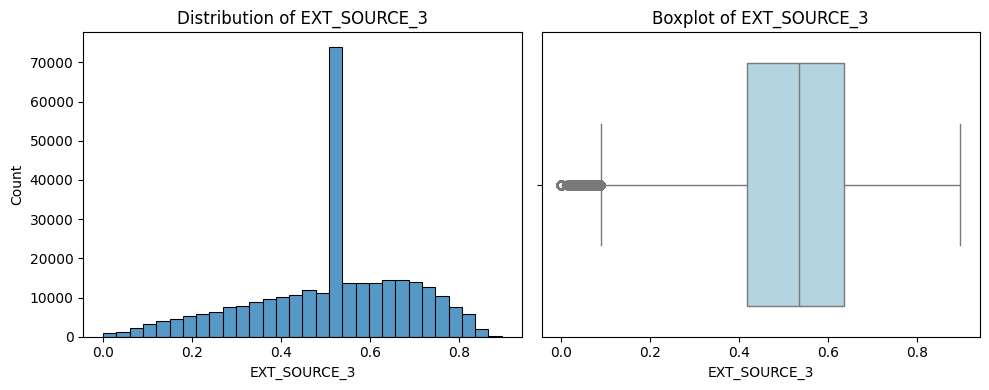

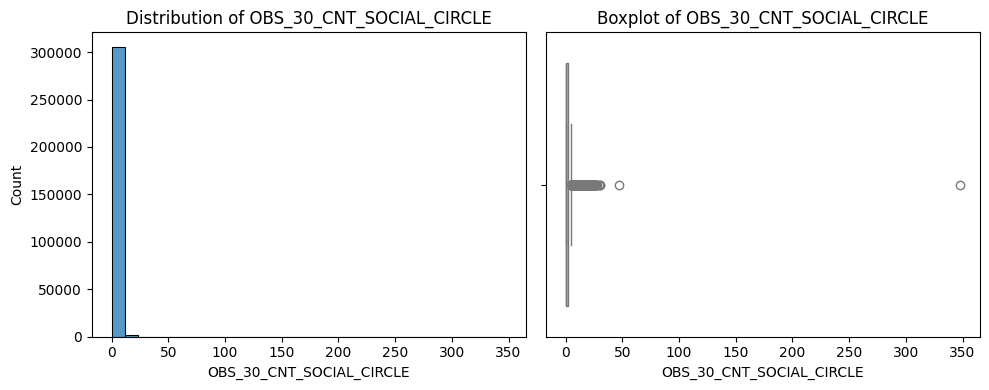

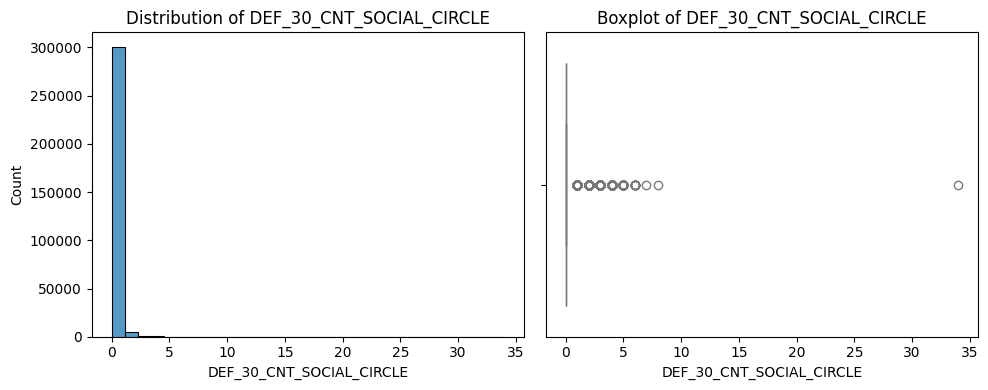

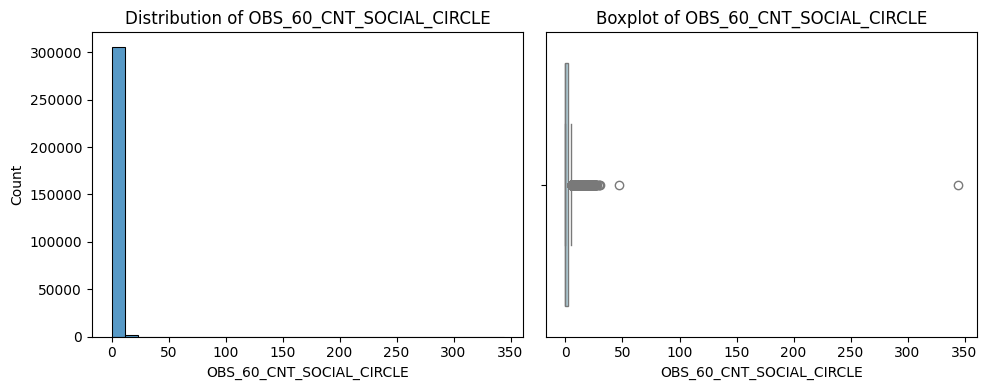

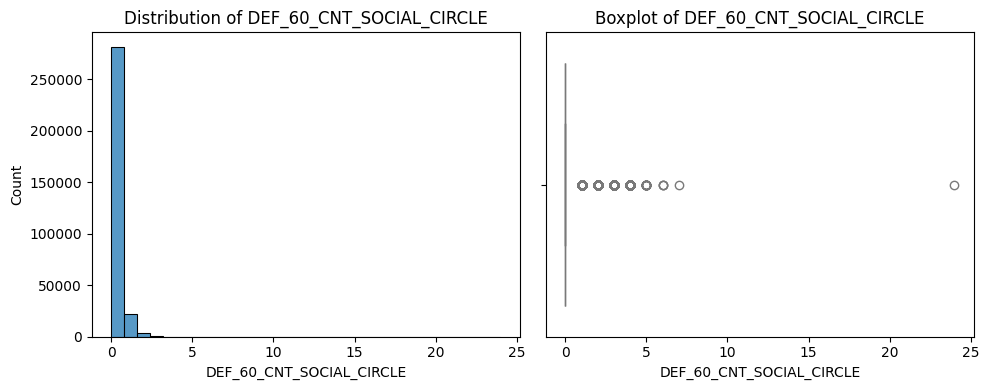

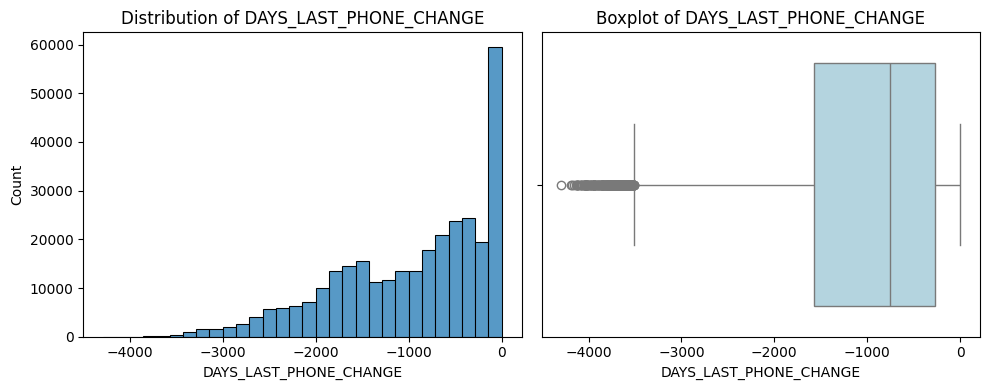

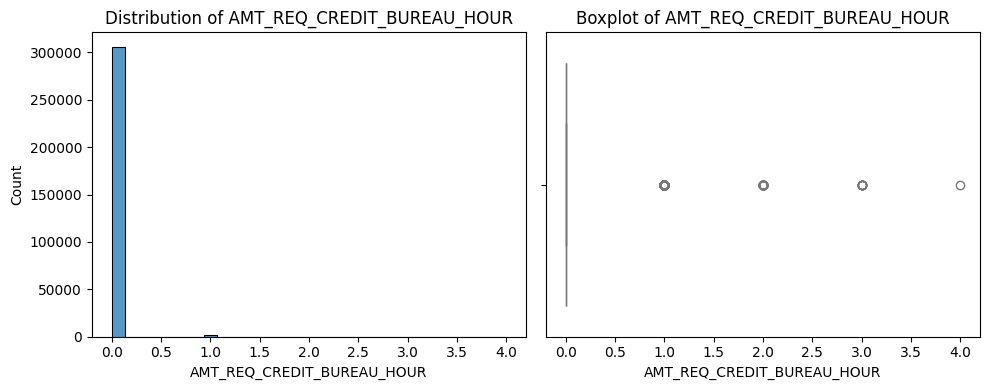

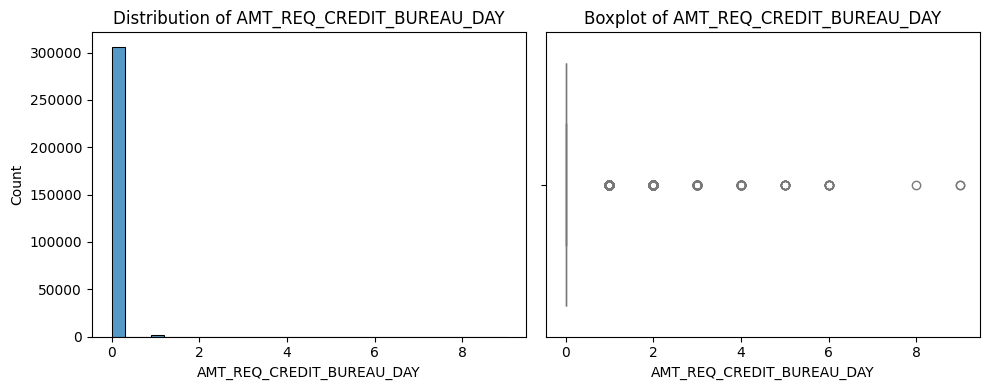

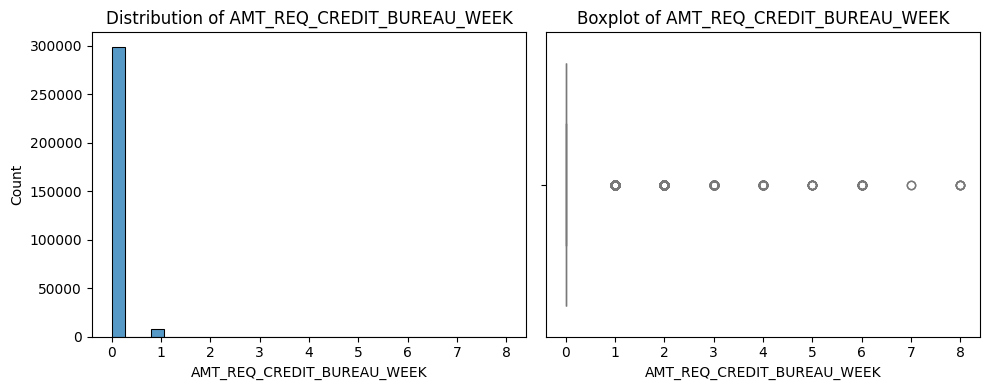

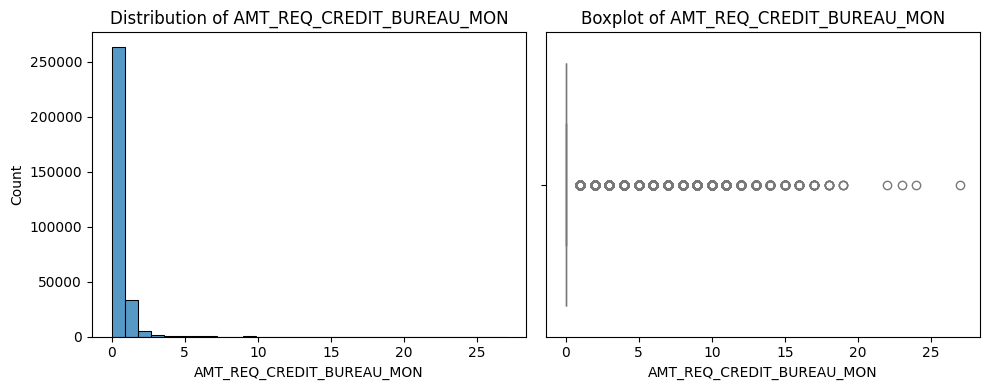

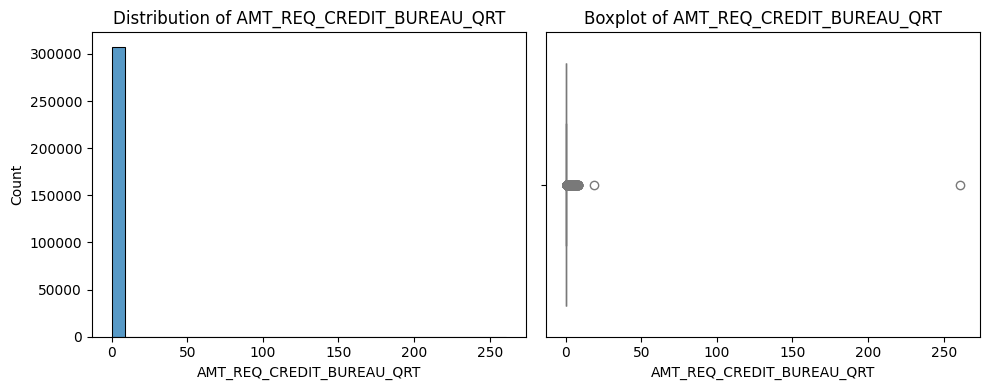

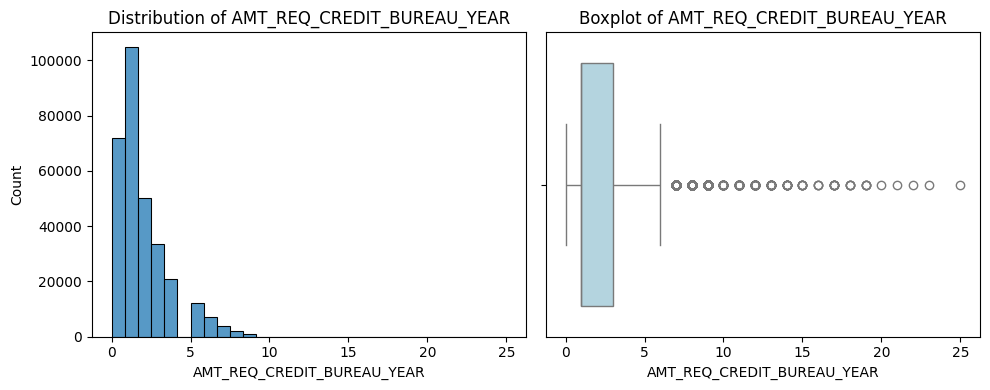

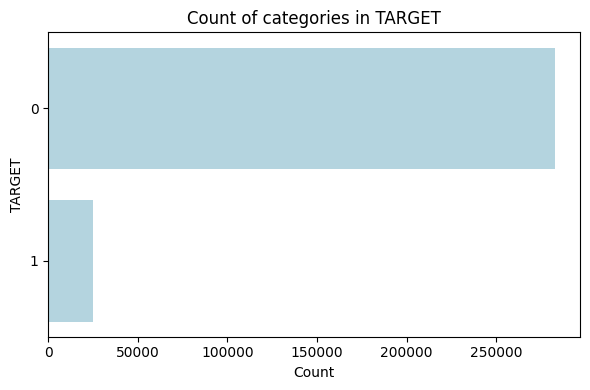

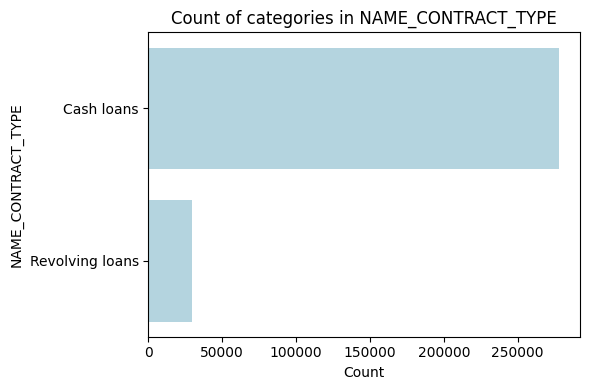

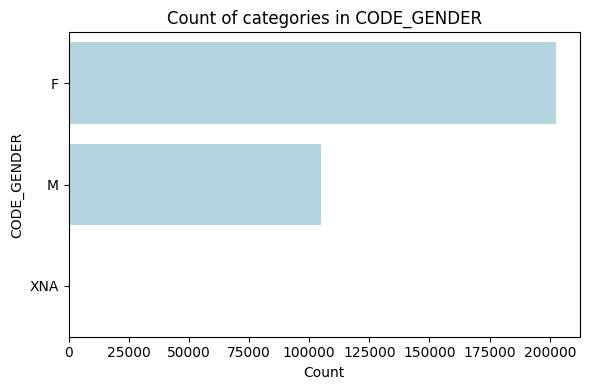

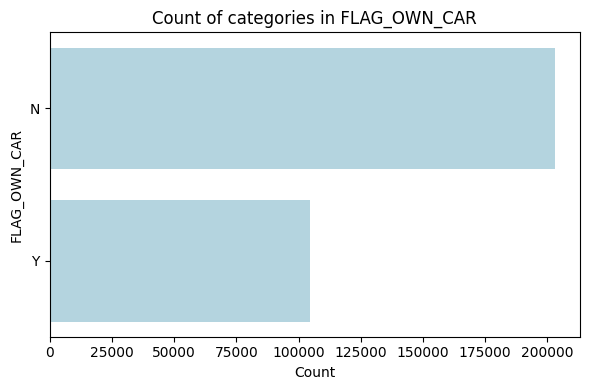

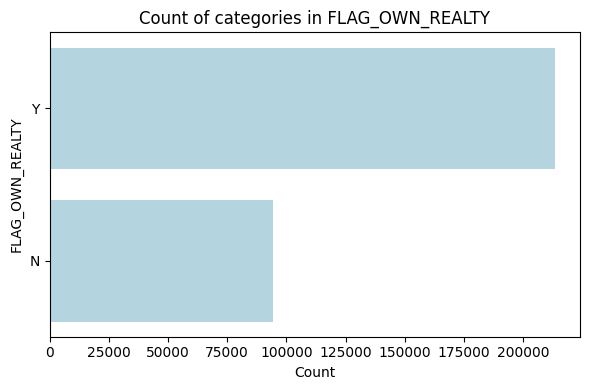

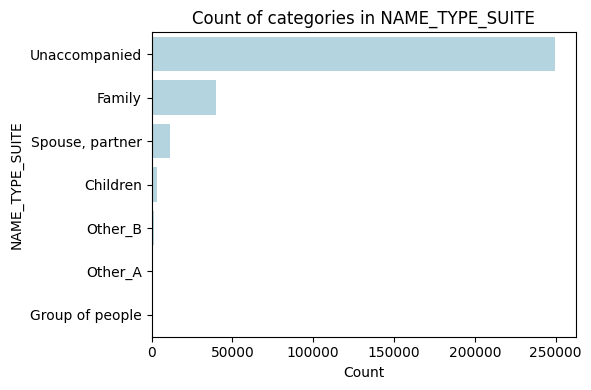

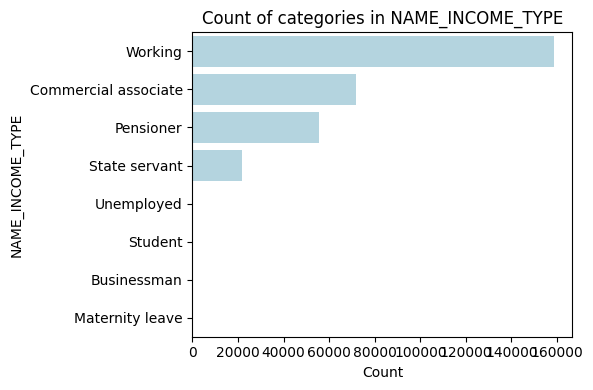

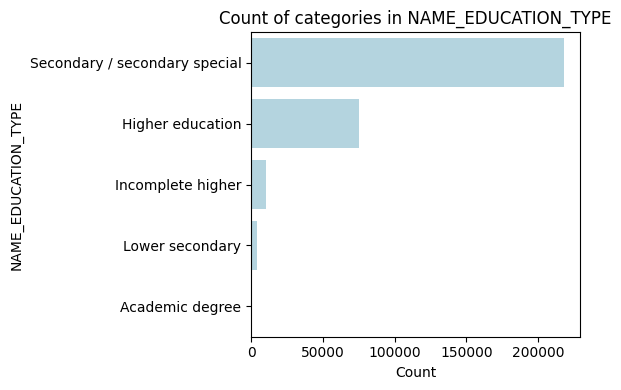

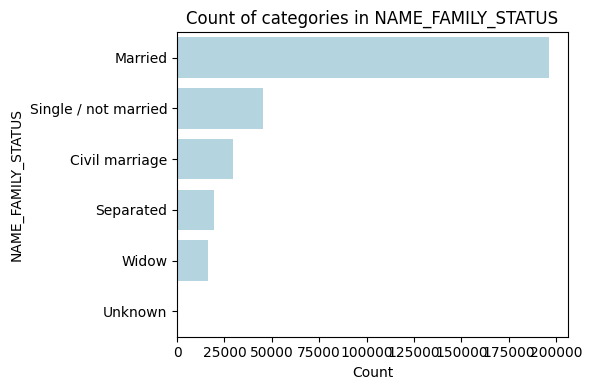

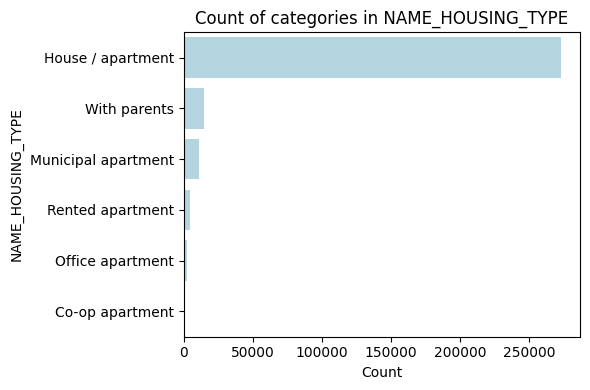

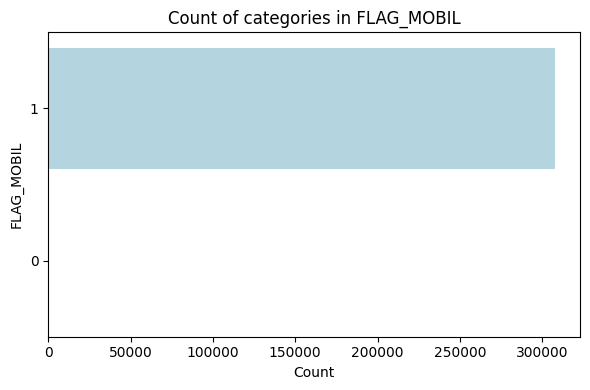

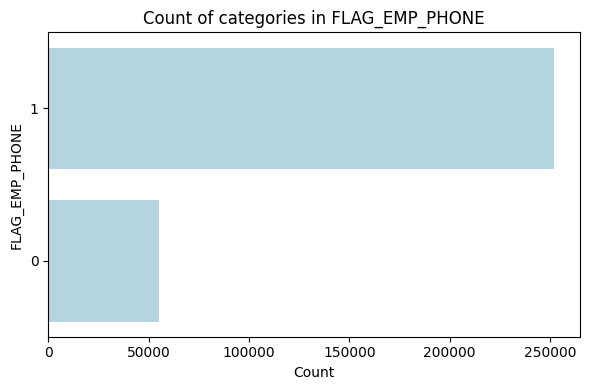

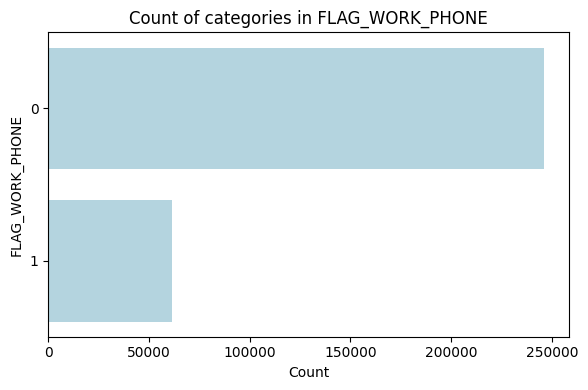

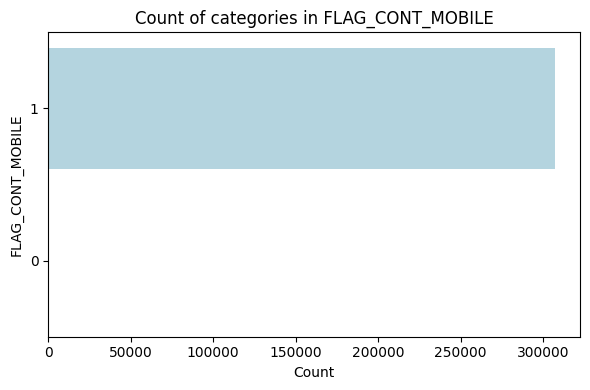

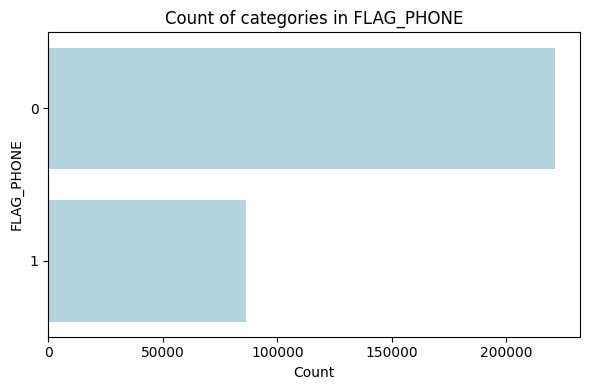

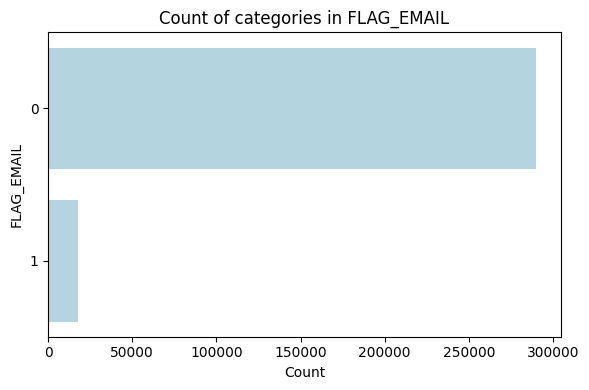

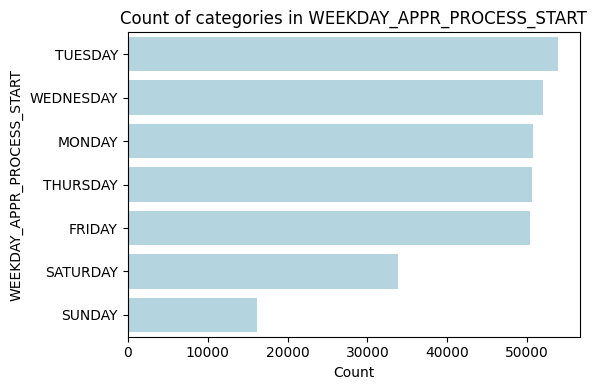

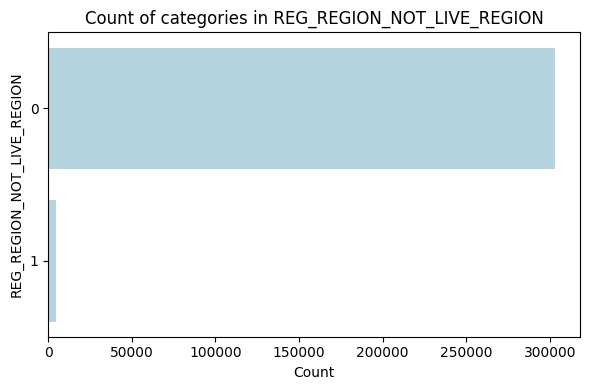

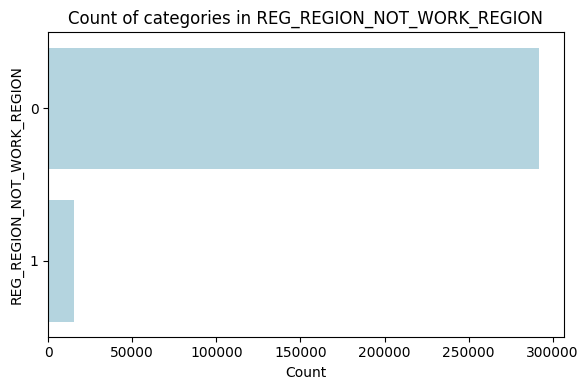

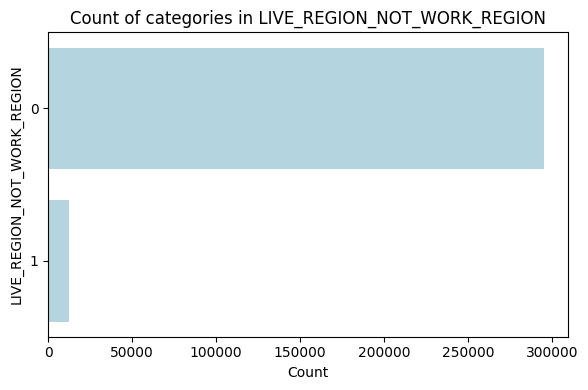

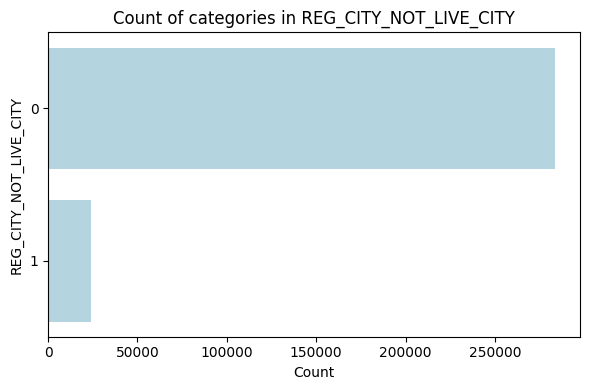

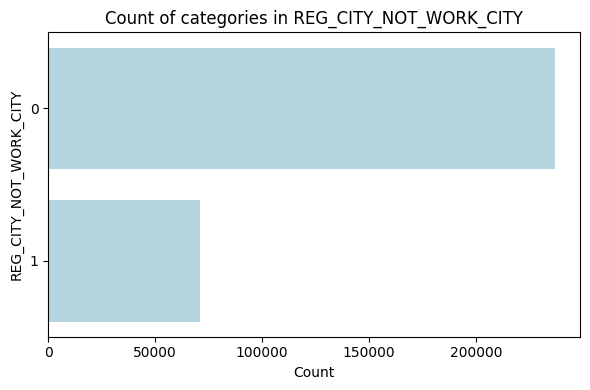

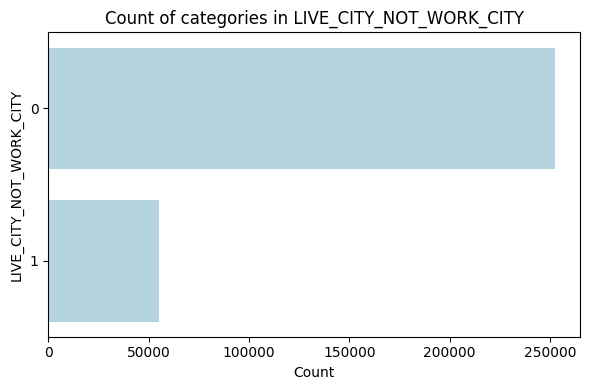

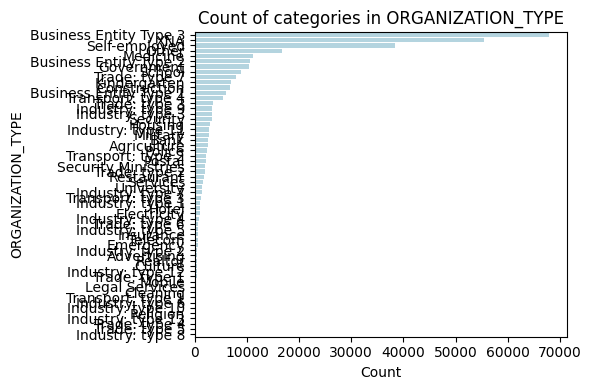

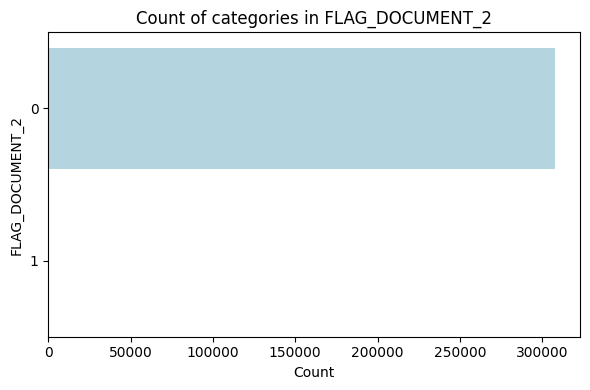

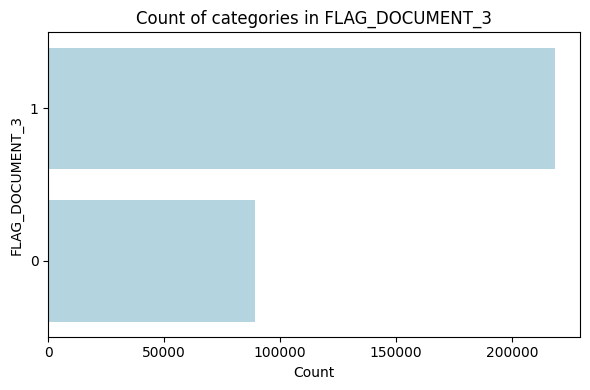

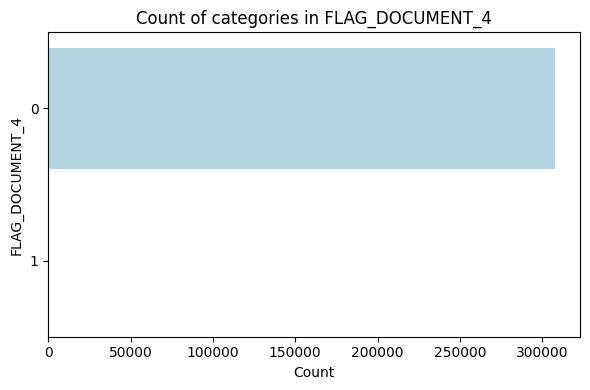

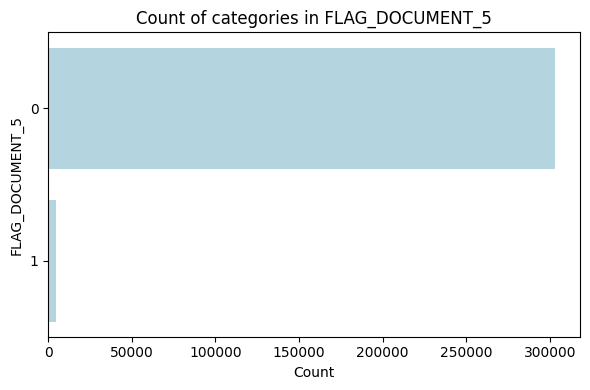

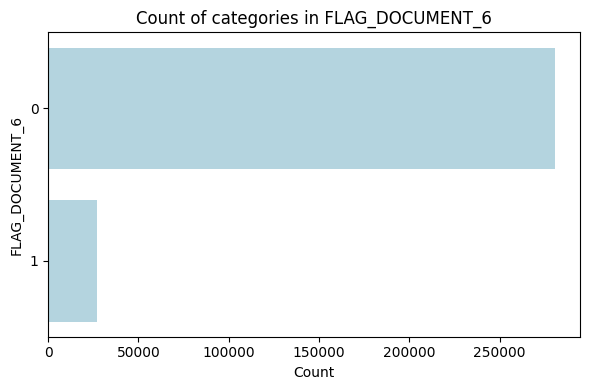

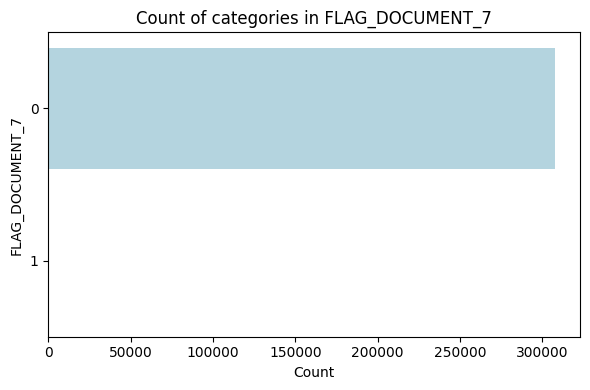

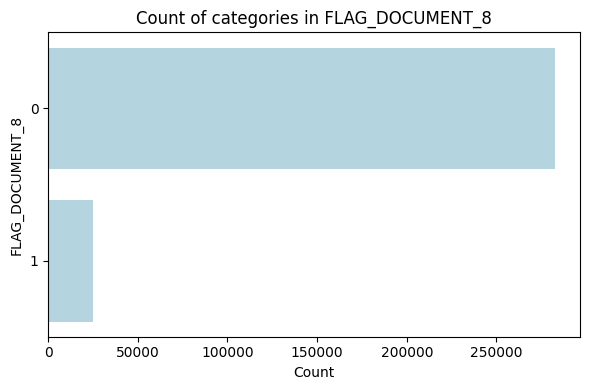

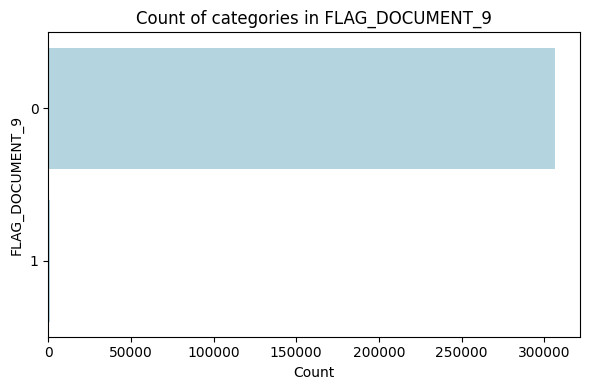

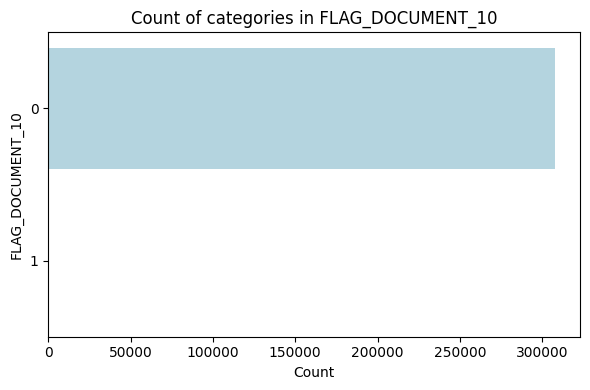

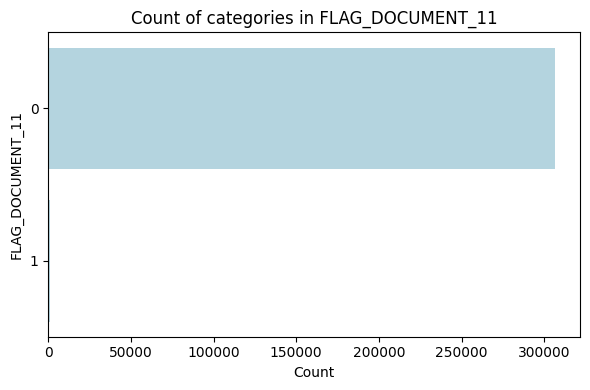

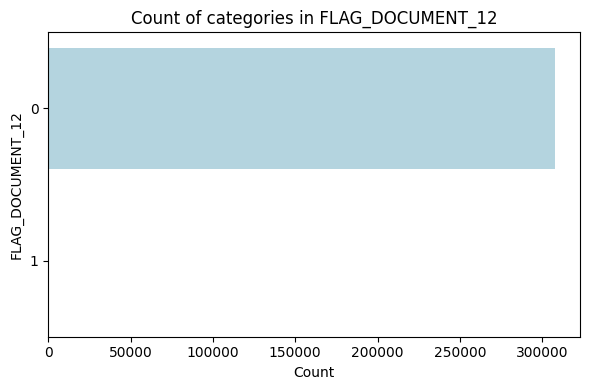

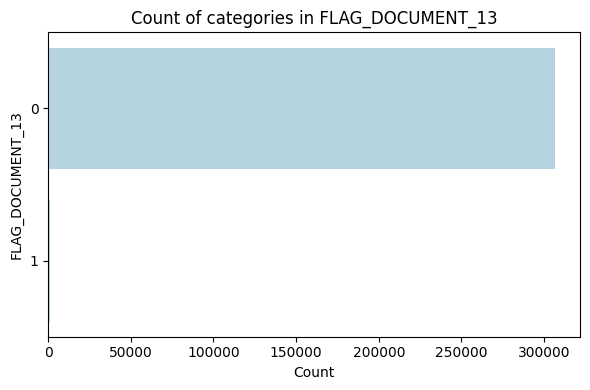

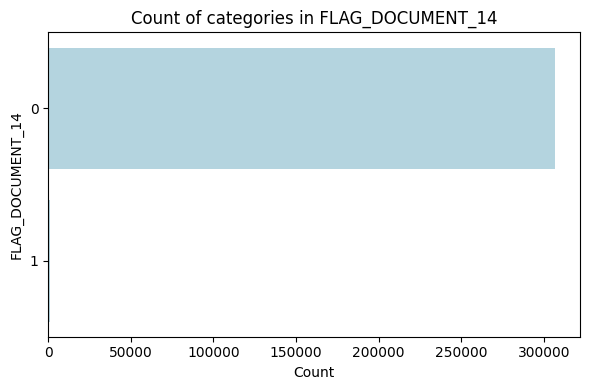

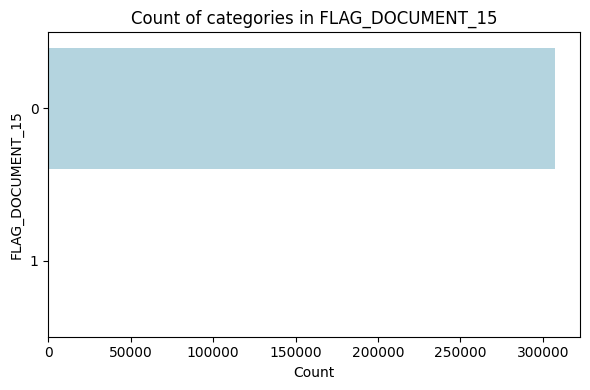

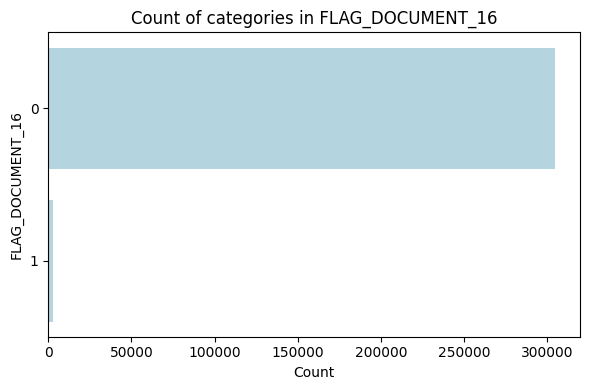

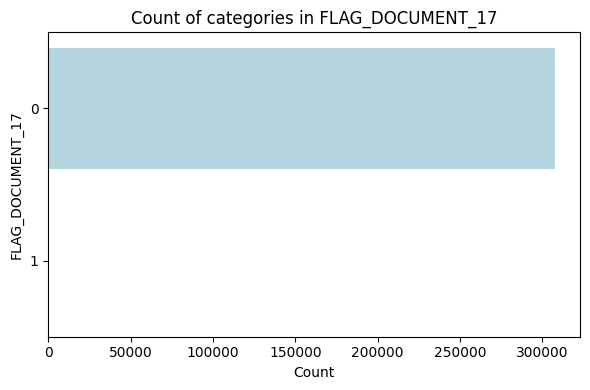

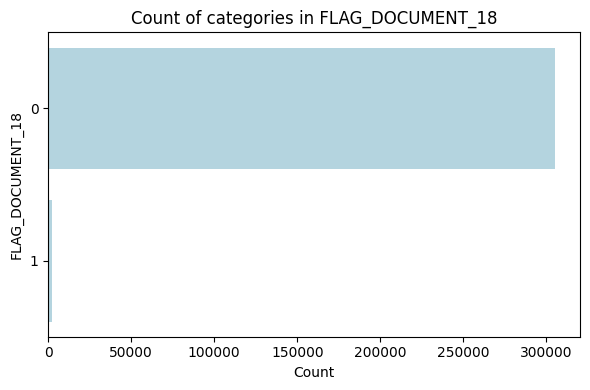

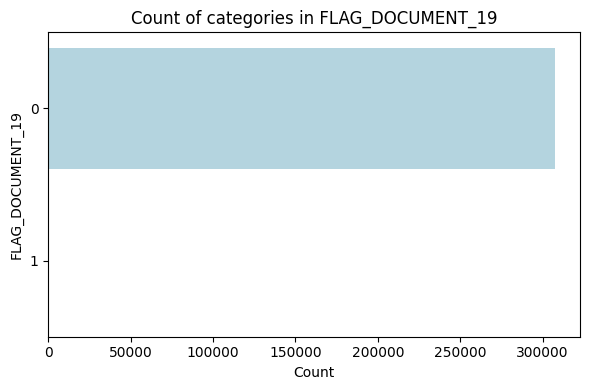

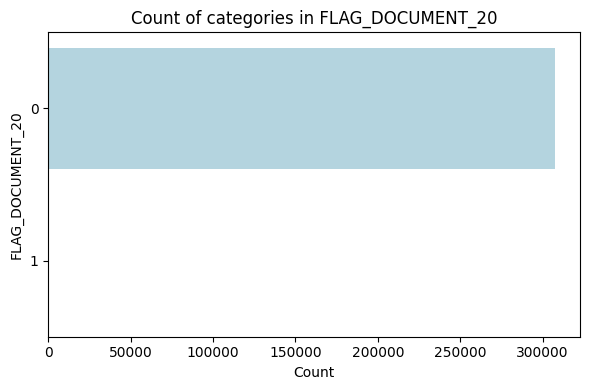

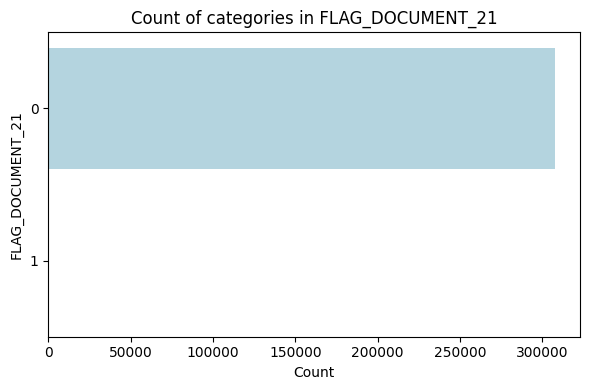

In [ ]:
visualize_features(data_train)

Після огляду графіків можна побачити, що наші дані не збалансовані: у таргета значень 0 значно більше, ніж 1. Також у деяких ознаках присутні численні аутлайєри. Крім того, у колонці, що визначає гендер, спостерігається дивна категорія 'XNA', яку під час кодування необхідно буде замінити на інший тип гендеру. Видалемо частину  аутлеєрів у деяких фіч

In [ ]:
def remove_upper_outliers(df, feature, quantile=0.95):
    before = len(df)
    threshold = df[feature].quantile(quantile)

    # Filter rows above threshold
    df_filtered = df[df[feature] <= threshold]
    after = len(df_filtered)

    removed_count = before - after
    removed_percent = (removed_count / before) * 100

    print(f"Removed {removed_count} rows ({removed_percent:.5f}%) "
          f"(values above {quantile*100:.0f}th percentile in '{feature}').")
    print(f"Threshold value: {threshold:.2f}\n")

    # --- Graphs before removing outliers ---
    plt.figure(figsize=(10, 4))

    # Histogram before
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=False, bins=30)
    plt.title(f'Distribution of {feature} (Before)')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Boxplot before
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(f'Boxplot of {feature} (Before)')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

    # --- Graphs after removing outliers ---
    plt.figure(figsize=(10, 4))

    # Histogram after
    plt.subplot(1, 2, 1)
    sns.histplot(df_filtered[feature], kde=False, bins=30)
    plt.title(f'Distribution of {feature} (After)')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Boxplot after
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_filtered[feature], color='lightblue')
    plt.title(f'Boxplot of {feature} (After)')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

    return df_filtered, removed_percent

Removed 278 rows (0.09040%) (values above 100th percentile in 'AMT_INCOME_TOTAL').
Threshold value: 900000.00



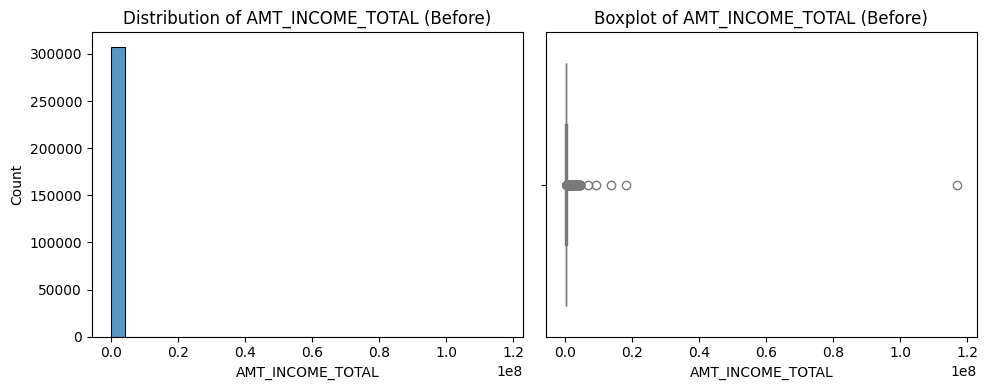

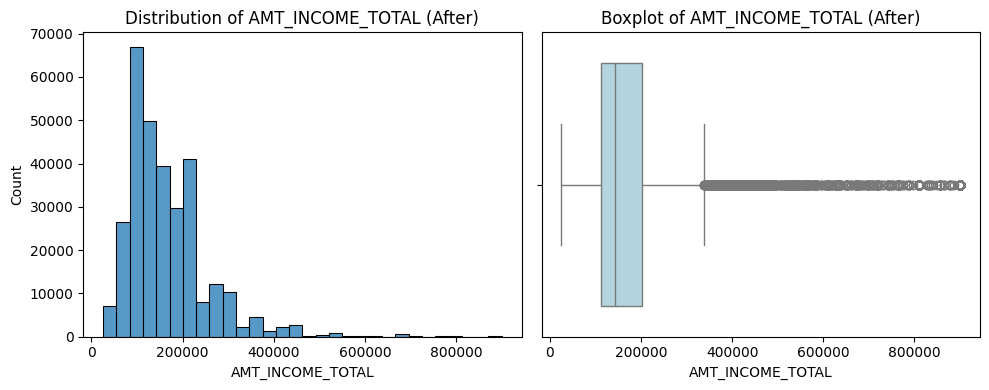

In [ ]:
data_train, _ = remove_upper_outliers(data_train, 'AMT_INCOME_TOTAL', quantile=0.999)

Removed 8359 rows (2.72074%) (values above 97th percentile in 'REGION_POPULATION_RELATIVE').
Threshold value: 0.05



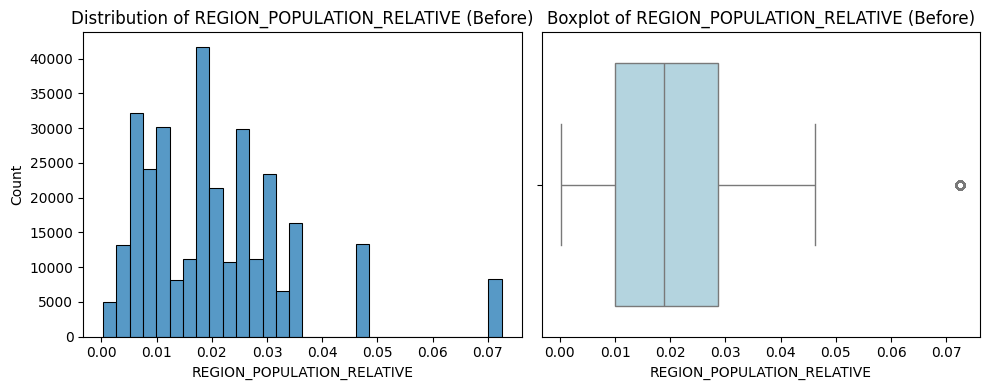

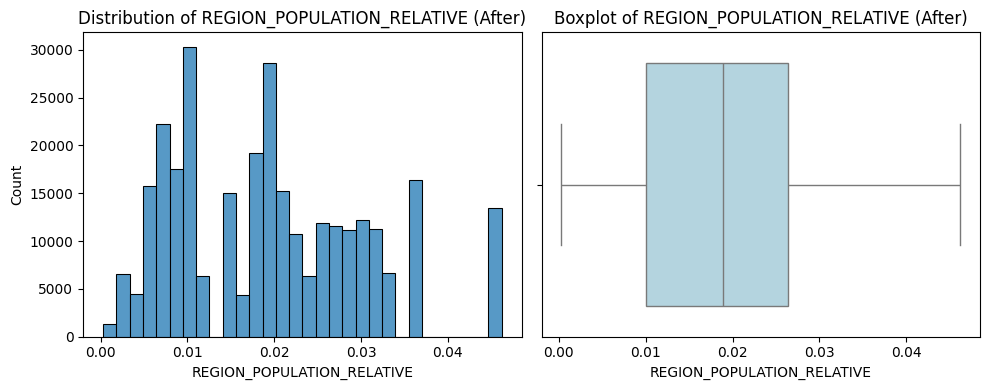

In [ ]:
data_train, _ = remove_upper_outliers(data_train, 'REGION_POPULATION_RELATIVE', quantile=0.972)

Removed 54085 rows (18.09625%) (values above 82th percentile in 'DAYS_EMPLOYED').
Threshold value: -69.00



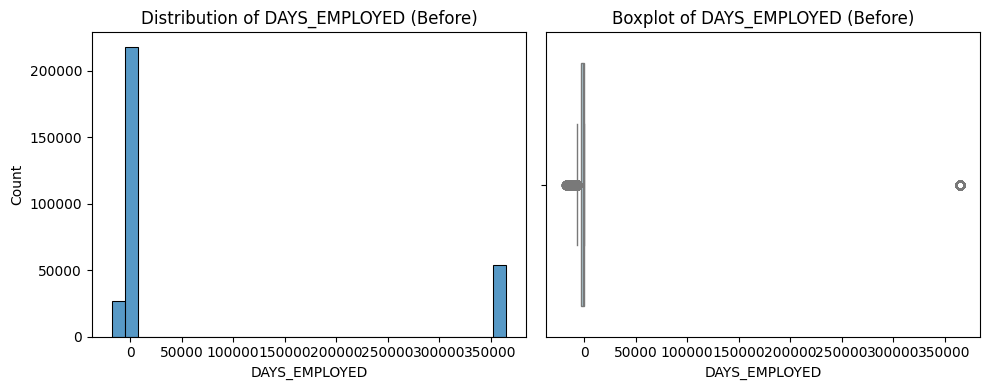

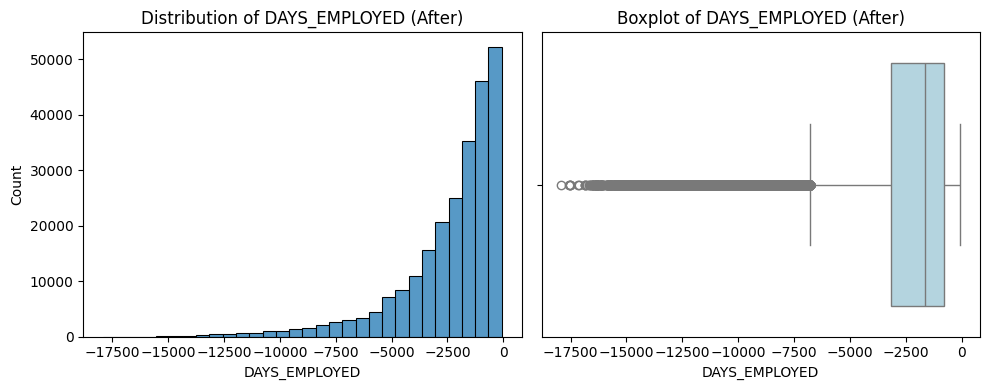

In [ ]:
data_train, _ = remove_upper_outliers(data_train, 'DAYS_EMPLOYED', quantile=0.819)

Removed 115 rows (0.04698%) (values above 100th percentile in 'CNT_FAM_MEMBERS').
Threshold value: 6.00



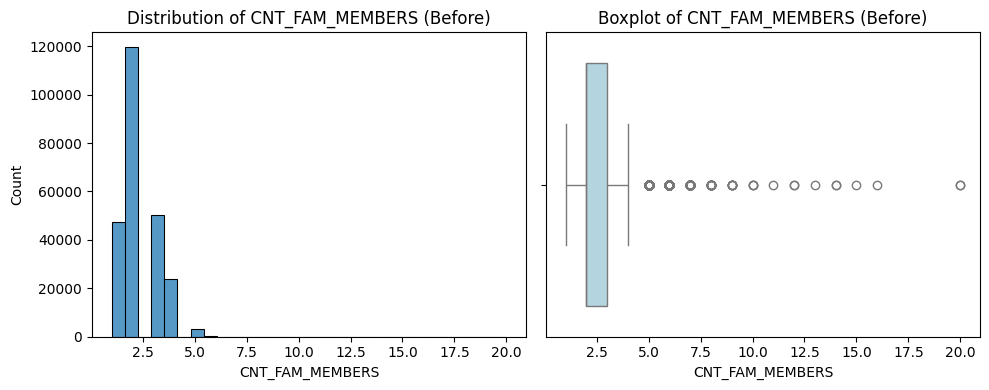

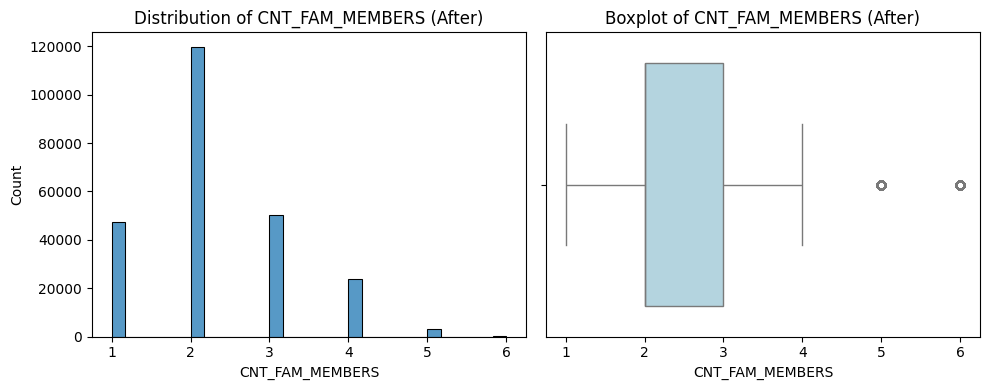

In [ ]:
data_train, _ = remove_upper_outliers(data_train, 'CNT_FAM_MEMBERS', quantile=0.999)

Removed 230 rows (0.09400%) (values above 100th percentile in 'OBS_30_CNT_SOCIAL_CIRCLE').
Threshold value: 16.00



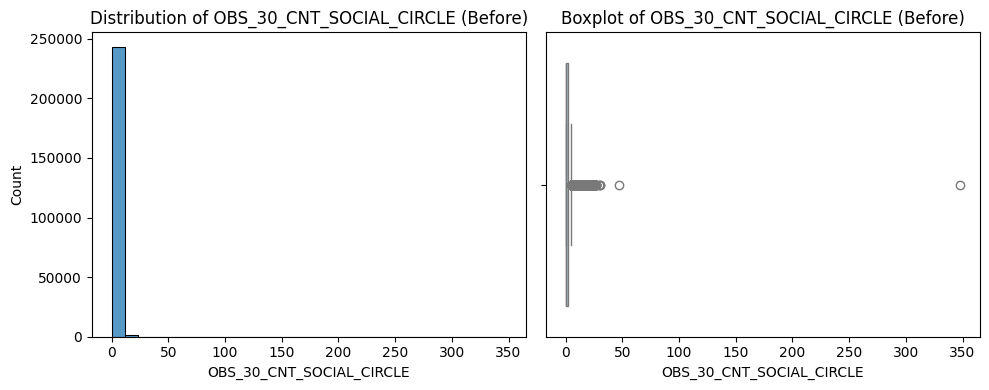

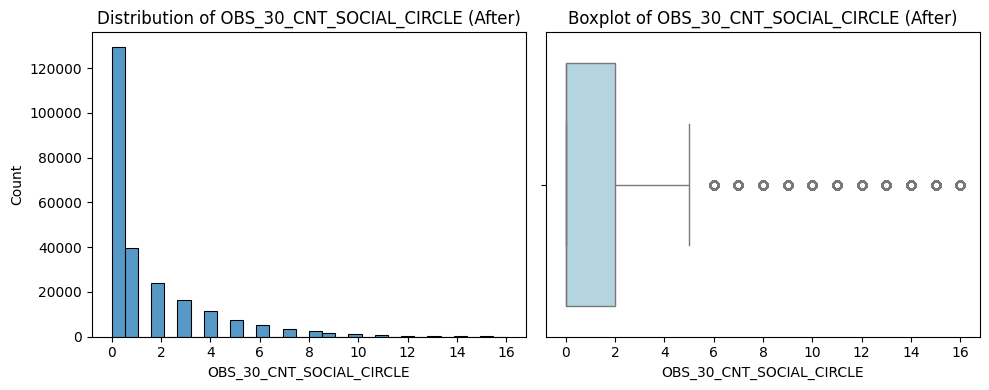

In [ ]:
data_train, _ = remove_upper_outliers(data_train, 'OBS_30_CNT_SOCIAL_CIRCLE', quantile=0.999)

Removed 239 rows (0.09777%) (values above 100th percentile in 'DEF_30_CNT_SOCIAL_CIRCLE').
Threshold value: 3.00



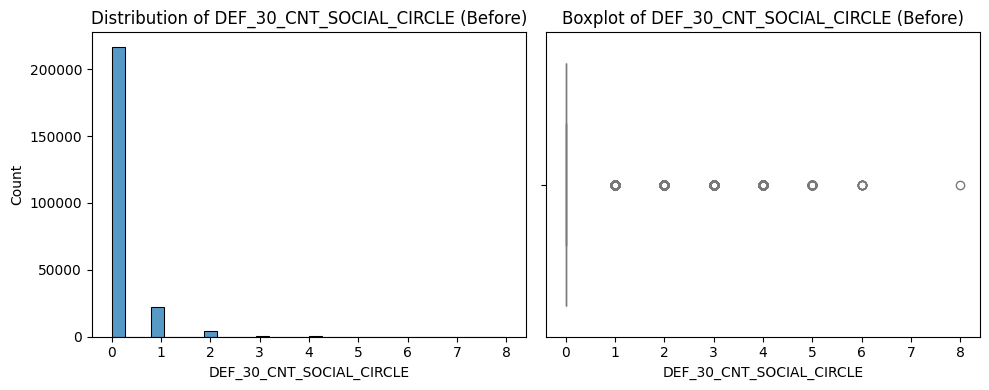

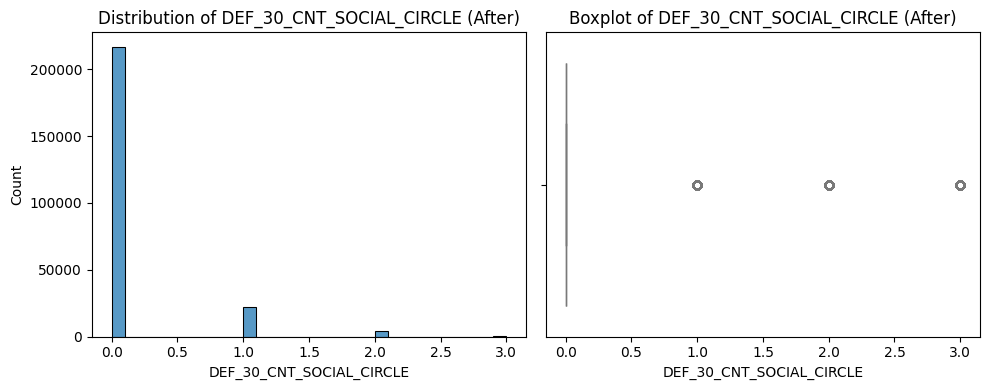

In [ ]:
data_train, _ = remove_upper_outliers(data_train, 'DEF_30_CNT_SOCIAL_CIRCLE', quantile=0.999)

Removed 219 rows (0.08968%) (values above 100th percentile in 'OBS_60_CNT_SOCIAL_CIRCLE').
Threshold value: 14.00



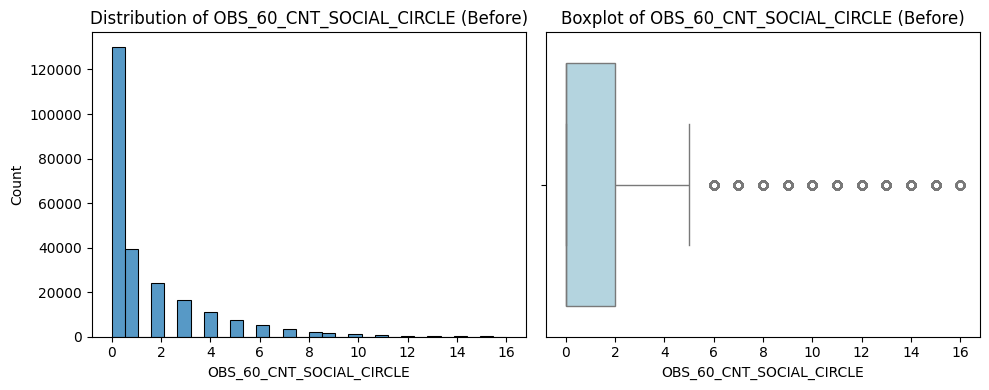

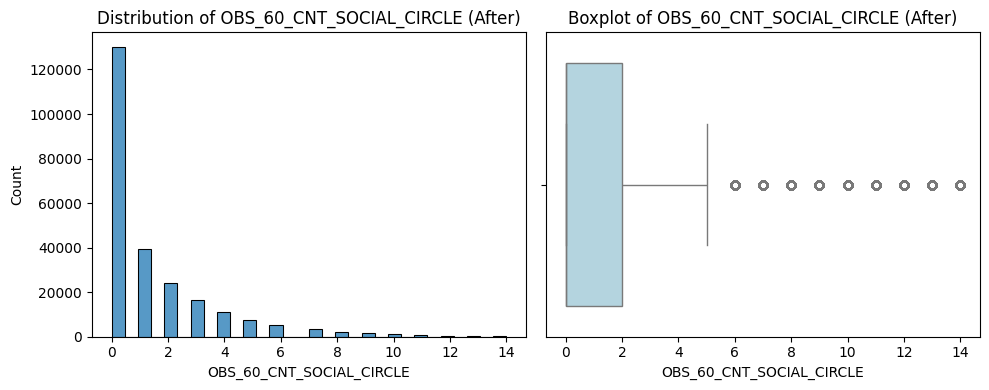

In [ ]:
data_train, _ = remove_upper_outliers(data_train, 'OBS_60_CNT_SOCIAL_CIRCLE', quantile=0.999)

Removed 0 rows (0.00000%) (values above 100th percentile in 'DEF_60_CNT_SOCIAL_CIRCLE').
Threshold value: 3.00



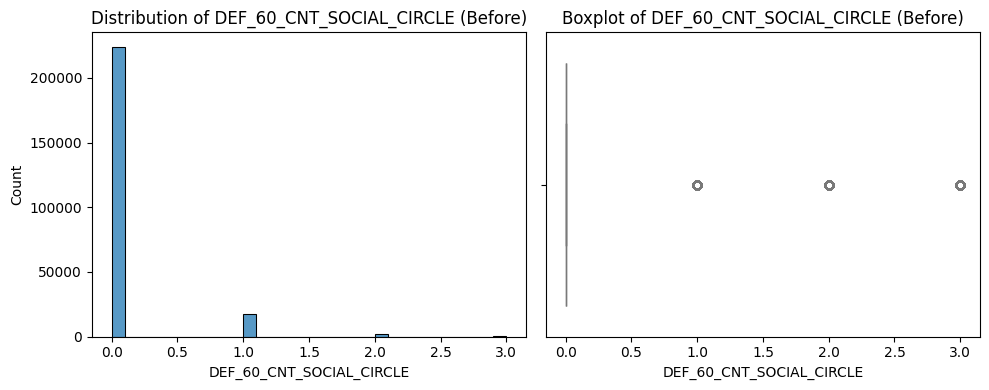

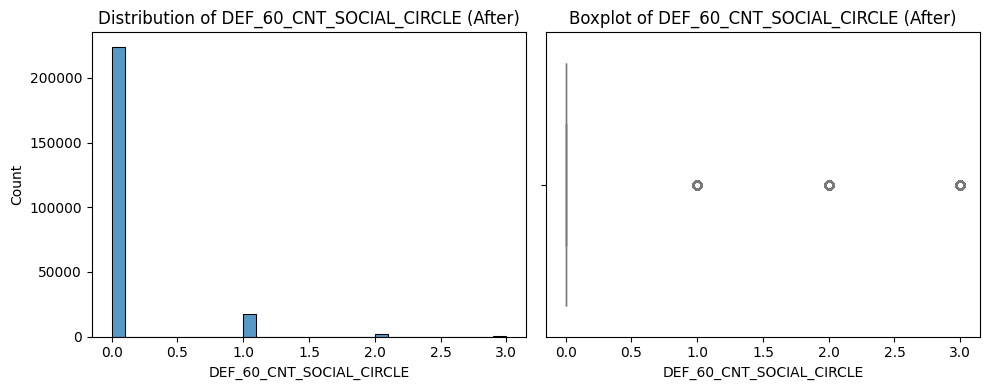

In [ ]:
data_train, _ = remove_upper_outliers(data_train, 'DEF_60_CNT_SOCIAL_CIRCLE', quantile=0.999)

Removed 85 rows (0.03484%) (values above 100th percentile in 'AMT_REQ_CREDIT_BUREAU_QRT').
Threshold value: 4.00



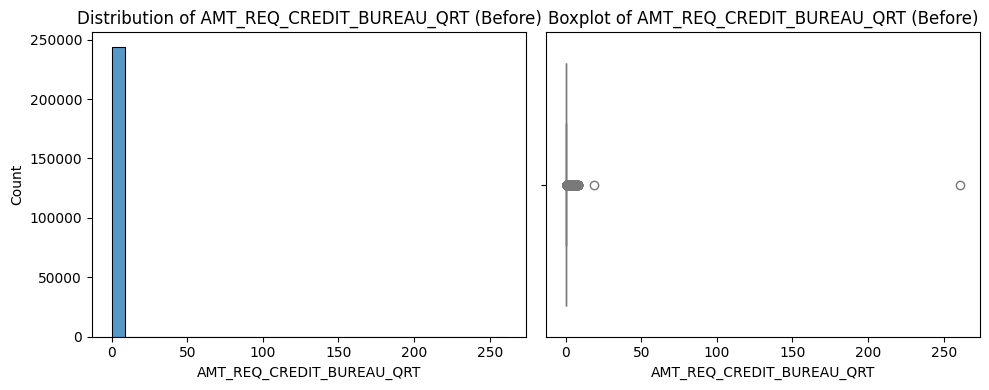

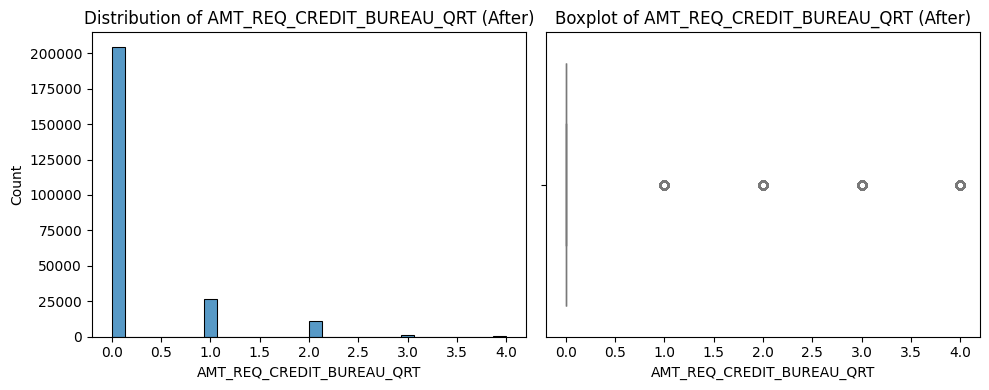

In [ ]:
data_train, _ = remove_upper_outliers(data_train, 'AMT_REQ_CREDIT_BUREAU_QRT', quantile=0.999)

In [ ]:
cols_to_remove = ['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',]
data_train = data_train.drop(columns=cols_to_remove, errors='ignore')

In [ ]:
data_test = data_test.drop(columns=cols_to_remove, errors='ignore')

#Обробка категоріальних фіч

На цьому етапі кодуємо категоріальні змінні для моделей машинного навчання:

Колонки з типом category перетворюємо на object, щоб уникнути помилок.

Бінарні ознаки (CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_CONTRACT_TYPE) мапимо у 0 та 1; 'XNA' у CODE_GENDER замінюємо на 1.

Освітні рівні (NAME_EDUCATION_TYPE) кодуємо числами від 1 до 5.

Інші категоріальні ознаки ділимо на малі (one-hot) та великі (частотне кодування).

Вирівнюємо тестовий набір під тренувальний, заповнюємо відсутні значення нулями, а булеві колонки перетворюємо на int64.

Цільову змінну TARGET приводимо до int64.

Результат – повністю числові тренувальний та тестовий датасети, готові для навчання моделей.

In [ ]:
def encode_categorical_train_test(train_df, test_df, freq_thresh=10):
    # --- Copy and convert category → object to avoid Categorical assignment errors ---
    train_encoded = train_df.copy().apply(
        lambda col: col.astype('object') if col.dtype.name == 'category' else col
    )
    test_encoded = test_df.copy().apply(
        lambda col: col.astype('object') if col.dtype.name == 'category' else col
    )

    # --- Binary mapping ---
    binary_map = {
        "CODE_GENDER": {"F": 0, "M": 1, "XNA": 1},
        "FLAG_OWN_CAR": {"N": 0, "Y": 1},
        "FLAG_OWN_REALTY": {"N": 0, "Y": 1},
        "NAME_CONTRACT_TYPE": {"Cash loans": 0, "Revolving loans": 1}
    }
    for col, mapping in binary_map.items():
        if col in train_encoded.columns:
            train_encoded[col] = train_encoded[col].map(mapping).astype('int64')
        if col in test_encoded.columns:
            test_encoded[col] = test_encoded[col].map(mapping).astype('int64')

    # --- Education mapping (one column, 1–5) ---
    edu_map = {
        "Lower secondary": 1,
        "Secondary / secondary special": 2,
        "Incomplete higher": 3,
        "Higher education": 4,
        "Academic degree": 5
    }
    if "NAME_EDUCATION_TYPE" in train_encoded.columns:
        train_encoded["NAME_EDUCATION_TYPE"] = train_encoded["NAME_EDUCATION_TYPE"].map(edu_map).astype('int64')
    if "NAME_EDUCATION_TYPE" in test_encoded.columns:
        test_encoded["NAME_EDUCATION_TYPE"] = test_encoded["NAME_EDUCATION_TYPE"].map(edu_map).astype('int64')

    # --- Identify true categorical columns (exclude numeric) ---
    cat_cols = []
    for col in train_encoded.columns:
        if col in ['TARGET', 'NAME_EDUCATION_TYPE']:
            continue
        if train_encoded[col].dtype.name in ['category', 'object']:
            cat_cols.append(col)

    # --- Split small vs large categories ---
    small_cat_cols = [col for col in cat_cols if train_encoded[col].nunique() <= freq_thresh]
    large_cat_cols = [col for col in cat_cols if train_encoded[col].nunique() > freq_thresh]

    # --- One-hot encoding for small categories ---
    train_encoded = pd.get_dummies(train_encoded, columns=small_cat_cols, drop_first=True)
    test_encoded = pd.get_dummies(test_encoded, columns=small_cat_cols, drop_first=True)

    # --- Align test columns  ---
    train_cols_no_target = train_encoded.drop(columns=['TARGET'], errors='ignore').columns
    test_encoded = test_encoded.reindex(columns=train_cols_no_target, fill_value=0)

    # --- Frequency encoding for large categories ---
    for col in large_cat_cols:
        if col in train_encoded.columns:
            train_encoded[col] = train_encoded[col].astype('object')
            freq = train_df[col].value_counts(normalize=True)
            train_encoded[col] = train_encoded[col].map(freq).astype('float64')
            if col in test_encoded.columns:
                test_encoded[col] = test_encoded[col].astype('object').map(freq).fillna(0).astype('float64')

    # --- Convert bools to int64 ---
    bool_cols = train_encoded.select_dtypes(include='bool').columns
    for col in bool_cols:
        train_encoded[col] = train_encoded[col].astype('int64')
        if col in test_encoded.columns:
            test_encoded[col] = test_encoded[col].astype('int64')

    # --- TARGET to int64 (train only) ---
    if 'TARGET' in train_df.columns:
        train_encoded['TARGET'] = train_df['TARGET'].astype('int64')

    return train_encoded, test_encoded


In [ ]:
data_train_encoded, data_test_encoded = encode_categorical_train_test(data_train, data_test)


In [ ]:
data_train_encoded.dtypes

,0
TARGET,int64
NAME_CONTRACT_TYPE,int64
CODE_GENDER,int64
FLAG_OWN_CAR,int64
FLAG_OWN_REALTY,int64
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64
AMT_GOODS_PRICE,float64


In [ ]:
data_train_encoded.describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_EMP_PHONE_1,FLAG_WORK_PHONE_1,FLAG_PHONE_1,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,REG_CITY_NOT_LIVE_CITY_1,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_1,FLAG_DOCUMENT_3_1,FLAG_DOCUMENT_6_1,FLAG_DOCUMENT_8_1
count,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,2.439010e+05,243901.000000,2.439010e+05,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,2.439010e+05,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000,243901.000000
mean,0.087765,0.101652,0.375136,0.373037,0.679153,0.498214,170949.278094,6.049720e+05,27516.336813,5.434499e+05,2.547722,0.019472,-14760.115633,-2390.793896,-4609.896060,-2802.008877,2.253791,2.073444,2.051570,12.146121,0.111440,5.123621e-01,0.507396,1.393738,0.136744,1.376661,0.095543,-969.807442,0.005658,0.005978,0.029512,0.237633,0.222578,1.743761,0.126965,0.000845,0.002989,0.005822,0.038594,0.815806,0.274115,0.000021,0.000041,0.085367,0.000070,0.640362,0.651416,0.062944,0.154788,0.000008,0.026691,0.875454,0.033956,0.009184,0.018848,0.058569,0.999955,0.243931,0.269343,0.164981,0.112312,0.054567,0.163337,0.174546,0.167978,0.091533,0.287133,0.223168,0.769222,0.008708,0.092747
std,0.282954,0.302191,0.484159,0.483613,0.466803,0.753324,87460.726534,4.007414e+05,14312.654175,3.677927e+05,0.886872,0.011072,3660.869925,2342.931285,3244.417479,1514.392291,0.933330,0.488823,0.483688,3.290821,0.104303,1.895332e-01,0.176257,2.190487,0.417677,2.170440,0.340998,824.784677,0.078844,0.102156,0.189317,0.857650,0.561013,1.723718,0.332935,0.029050,0.054589,0.076080,0.192625,0.387643,0.446068,0.004528,0.006403,0.279427,0.008348,0.479895,0.476523,0.242862,0.361703,0.002864,0.161180,0.330205,0.181117,0.095393,0.135988,0.234816,0.006716,0.429452,0.443619,0.371164,0.315751,0.227134,0.36

#Кореляція даних

In [ ]:
def plot_corr_matrix(df: pd.DataFrame, figsize=(20, 20), annot=False, cmap='coolwarm'):
    corr_matrix = df.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=annot, cmap=cmap, center=0)
    plt.title("Correlation Matrix")
    plt.show()

    return corr_matrix

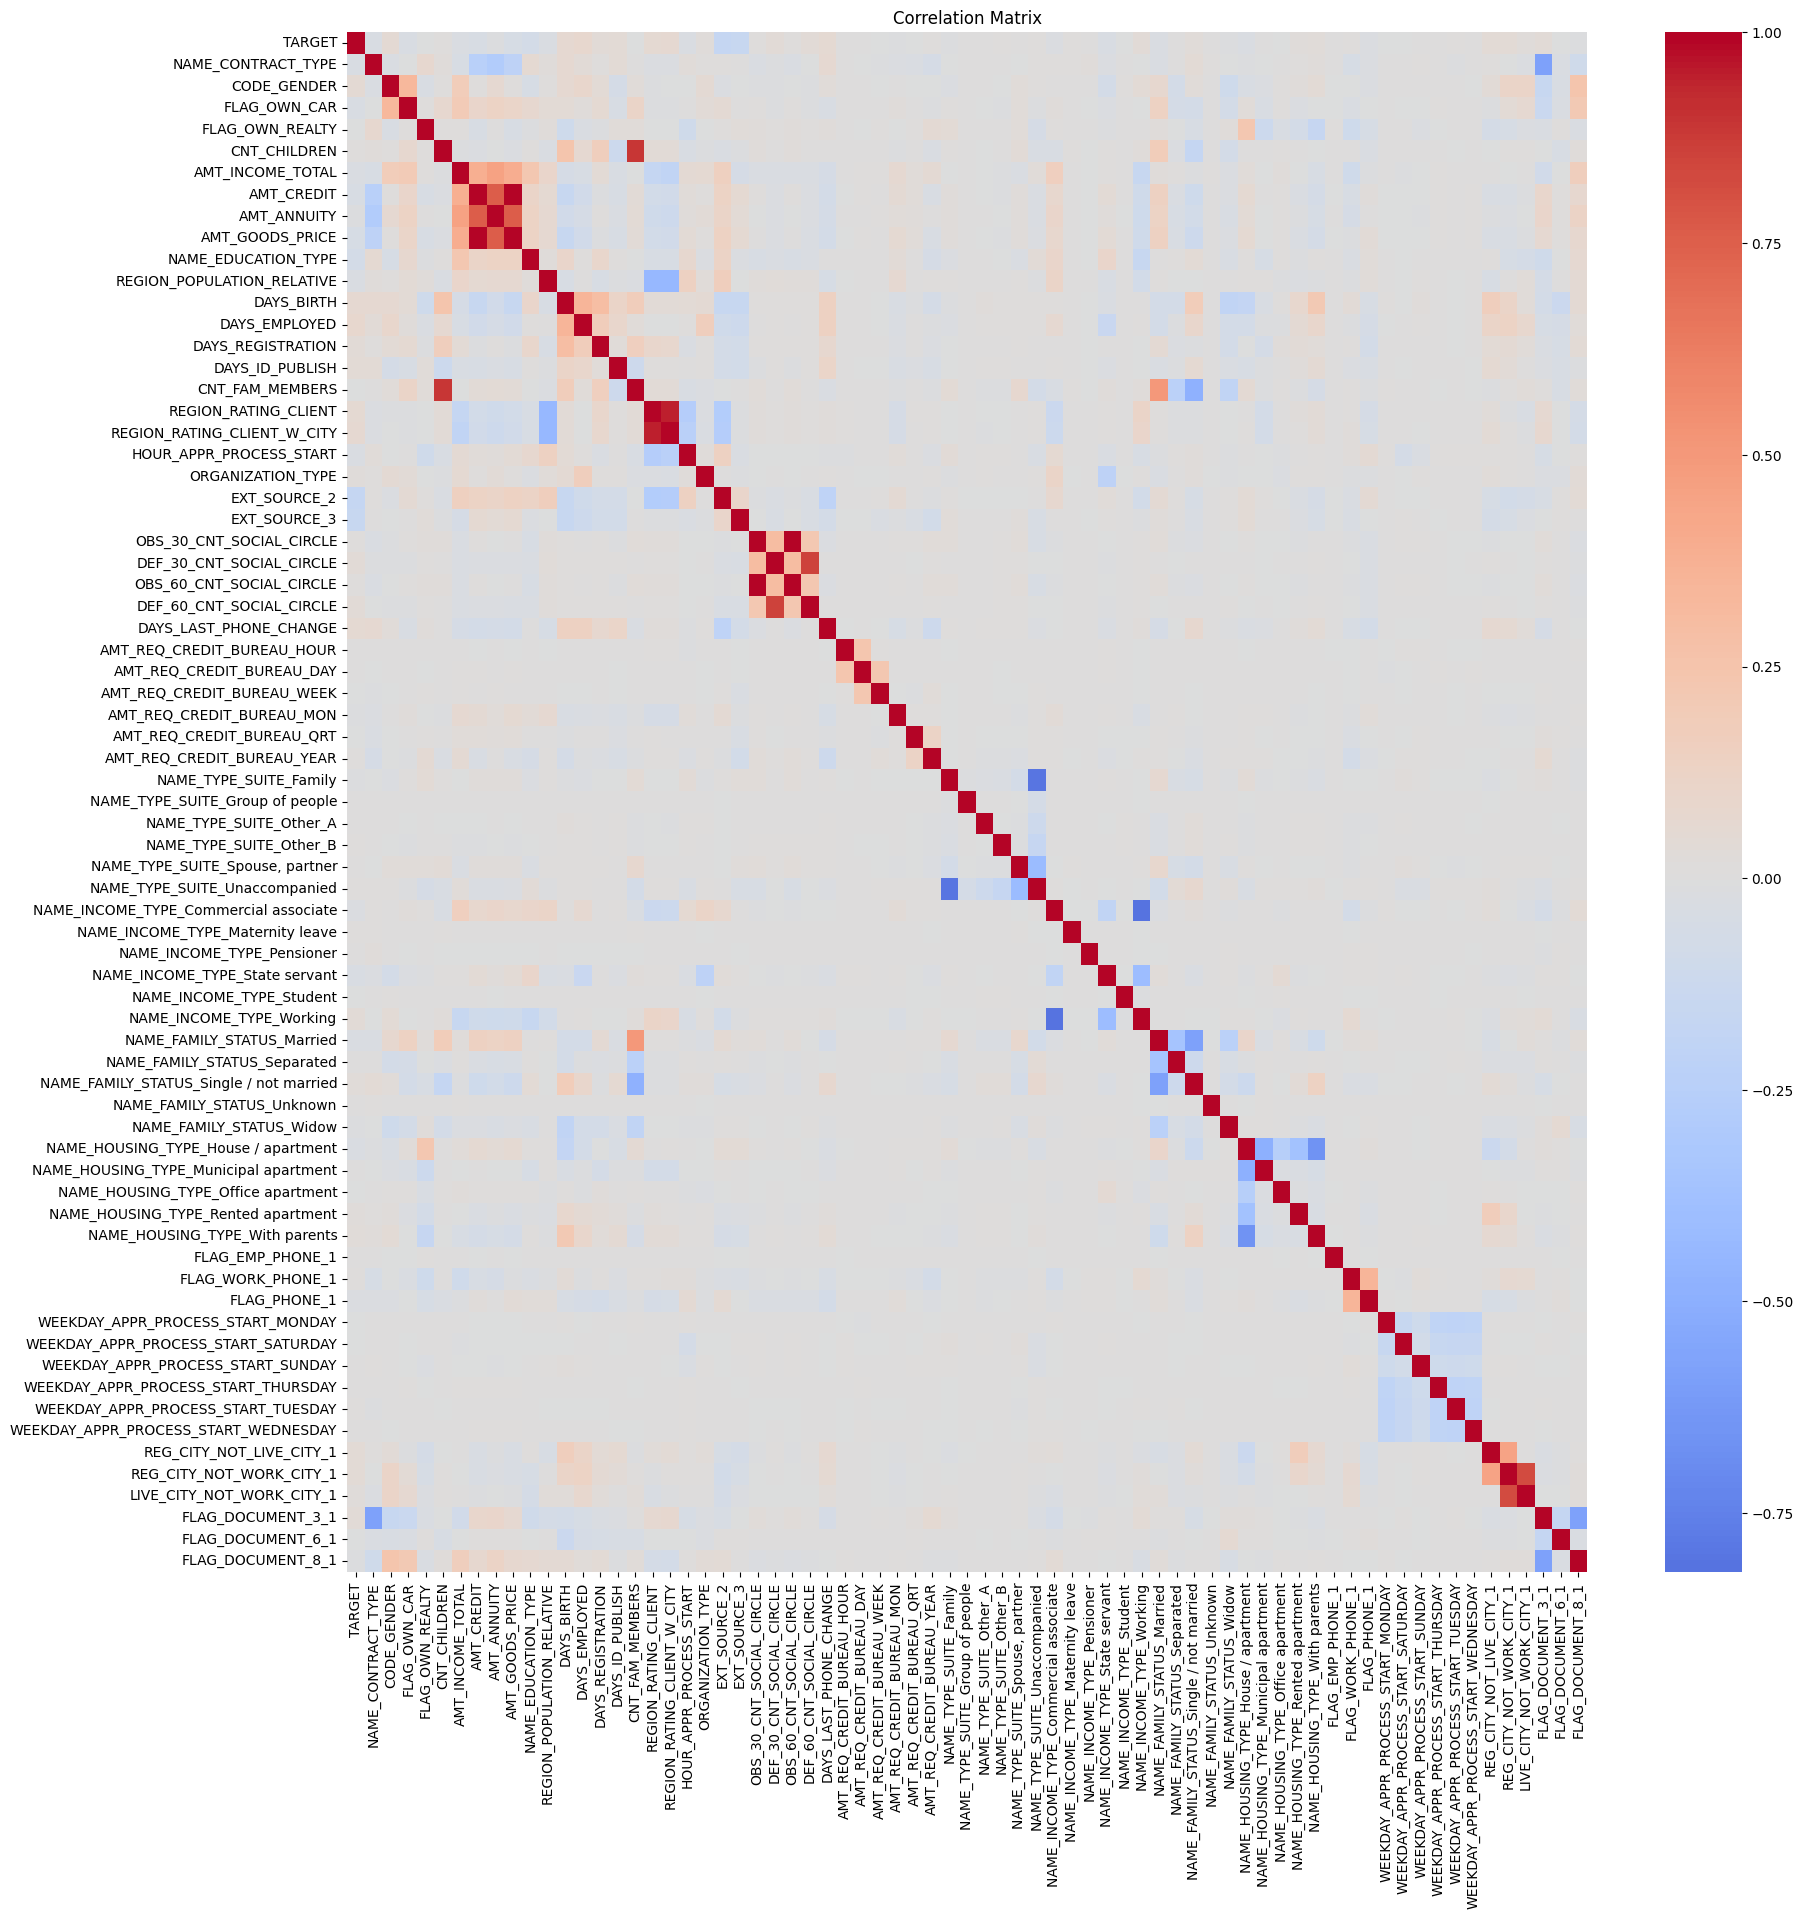

In [ ]:
corr_matrix = plot_corr_matrix(data_train_encoded)

Після аналізу кореляцій видно, що деякі ознаки сильно взаємопов’язані. Функція correlated_features знаходить всі пари ознак із абсолютною кореляцією вище заданого порогу.

Вона повертає дві таблиці:

Пари ознак із високою кореляцією з фактичними та абсолютними значеннями для сортування.

Частота появи кожної ознаки у таких парах, що допомагає визначити найбільш корельовані ознаки, які можна видалити або об’єднати.

In [ ]:
def correlated_features(corr_matrix, corr=0.5):
    corr_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > corr:
                corr_pairs.append((col1, col2, corr_value))

    corr_df = pd.DataFrame(corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])
    corr_df['AbsCorrelation'] = corr_df['Correlation'].abs()
    corr_df = corr_df.sort_values(by='AbsCorrelation', ascending=False).reset_index(drop=True)

    print("High correlation pairs:")
    display(corr_df)

    all_features = pd.concat([corr_df['Feature_1'], corr_df['Feature_2']])
    feature_counts = all_features.value_counts().reset_index()
    feature_counts.columns = ['Feature', 'Count']
    feature_counts = feature_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)

    print("\nFeature counts in correlated pairs:")
    display(feature_counts)


In [ ]:
correlated_features(corr_matrix)

High correlation pairs:


,Feature_1,Feature_2,Correlation,AbsCorrelation
0,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998166,0.998166
1,AMT_CREDIT,AMT_GOODS_PRICE,0.986056,0.986056
2,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.943955,0.943955
3,CNT_CHILDREN,CNT_FAM_MEMBERS,0.891709,0.891709
4,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.853864,0.853864
5,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Working,-0.819999,0.819999
6,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_1,0.815192,0.815192
7,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Unaccompanied,-0.802571,0.802571
8,AMT_ANNUITY,AMT_GOODS_PRICE,0.765233,0.765233
9,AMT_CREDIT,AMT_ANNUITY,0.762221,0.762221



Feature counts in correlated pairs:


,Feature,Count
0,AMT_CREDIT,2
1,FLAG_DOCUMENT_3_1,2
2,NAME_FAMILY_STATUS_Married,2
3,AMT_GOODS_PRICE,2
4,CNT_FAM_MEMBERS,2
5,AMT_ANNUITY,2
6,REGION_RATING_CLIENT,1
7,OBS_30_CNT_SOCIAL_CIRCLE,1
8,NAME_TYPE_SUITE_Family,1
9,REG_CITY_NOT_WORK_CITY_1,1


In [ ]:
cols_to_drop = [
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'AMT_GOODS_PRICE',
    'REGION_RATING_CLIENT_W_CITY',
    'CNT_CHILDREN',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'NAME_INCOME_TYPE_Working',
    'LIVE_CITY_NOT_WORK_CITY_1',
    'NAME_TYPE_SUITE_Unaccompanied',
    'AMT_ANNUITY',
    'NAME_HOUSING_TYPE_With parents',
    'NAME_FAMILY_STATUS_Single / not married',
    'FLAG_DOCUMENT_8_1',
    'FLAG_DOCUMENT_3_1'
]

data_train_encoded = data_train_encoded.drop(columns=cols_to_drop)
data_test_encoded = data_test_encoded.drop(columns=cols_to_drop)


#Побудова моделі

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from google.colab import files

виділяємо ознаки (X) і таргет (y). Потім розбиваємо дані на тренувальний і валідаційний набори у співвідношенні 80/20. Використовуємо stratify=y, щоб зберегти баланс класів між тренувальним і валідаційним наборами, та random_state=42 для відтворюваності.

In [ ]:
X = data_train_encoded.drop(columns=['TARGET'])
y = data_train_encoded['TARGET']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Використовуємо Pipeline, який об’єднує два кроки:

- StandardScaler() для стандартизації числових ознак (віднімання середнього та поділ на стандартне відхилення).

- LogisticRegression(max_iter=1000) для навчання логістичної регресії. max_iter=1000 забезпечує збіжність моделі.

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])


Пайплайн застосовується на тренувальних даних: спершу стандартизує ознаки, потім навчає логістичну регресію.

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

Оцінка моделі та побудова ROC-кривої

- Обчислюємо ймовірності класу 1 на валідаційному наборі.

- Розраховуємо метрику ROC-AUC.

- Будуємо ROC-криву для візуальної оцінки якості моделі.

In [ ]:
y_val_pred = pipe.predict_proba(X_val)[:, 1]
roc_auc_val = roc_auc_score(y_val, y_val_pred)
print(f"Validation ROC-AUC: {roc_auc_val:.4f}")

Validation ROC-AUC: 0.7388


Виведем ваги регресії

In [ ]:
logreg = pipe.named_steps['logreg']
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Weight': logreg.coef_[0]
}).sort_values(by='Weight', ascending=False)
print("\nIntercept (free term):", logreg.intercept_[0])

coefs


Intercept (free term): -2.6538035298740037


,Feature,Weight
1,CODE_GENDER,0.184718
9,DAYS_EMPLOYED,0.181593
13,REGION_RATING_CLIENT,0.083338
19,DEF_30_CNT_SOCIAL_CIRCLE,0.080403
11,DAYS_ID_PUBLISH,0.058718
20,DAYS_LAST_PHONE_CHANGE,0.056229
46,FLAG_WORK_PHONE_1,0.045277
3,FLAG_OWN_REALTY,0.040528
54,REG_CITY_NOT_LIVE_CITY_1,0.039909
15,ORGANIZATION_TYPE,0.038230


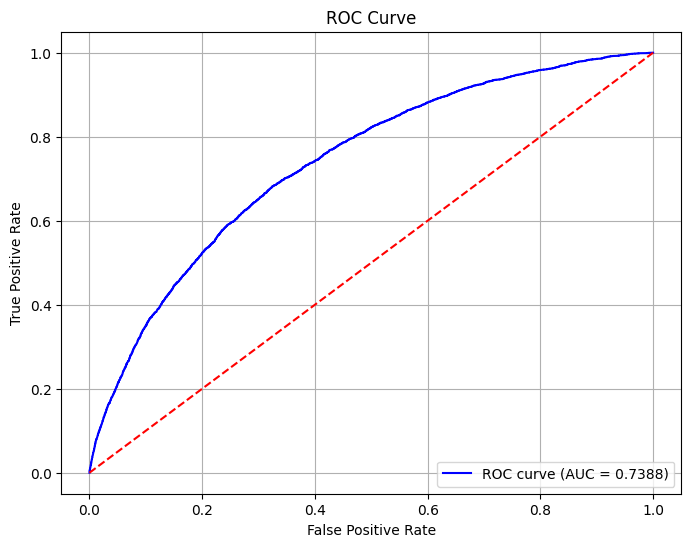

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#Тестування

In [ ]:
y_test_pred = pipe.predict_proba(data_test_encoded)[:, 1]

submission = pd.DataFrame({
    'SK_ID_CURR': test_ids,
    'TARGET': y_test_pred
})
submission.to_csv('sample_submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'


In [ ]:
#files.download("sample_submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

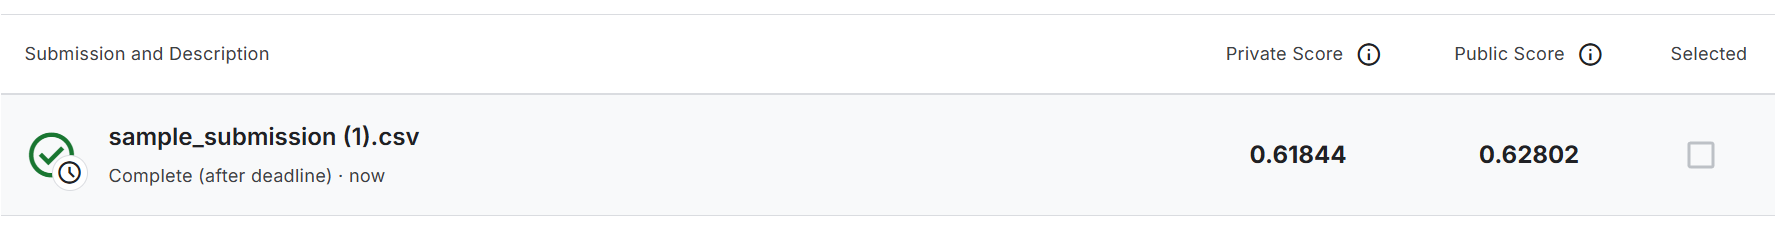

#Висновок

У ході виконання лабораторної роботи проведено повний цикл аналізу та побудови моделі класифікації на основі даних Kaggle-змагання Home Credit Default Risk.

Спершу виконано розвідку даних (EDA), оброблено пропуски середніми або медіанними значеннями залежно від типу ознаки. Категоріальні змінні кодували: бінарні — через mapping, малочастотні — One-Hot Encoding, багаточисельні — частотним кодуванням.

Аналіз кореляцій показав групи сильно залежних ознак, проте їх не видаляли, щоб не погіршити результати моделі.

Для моделювання застосовано логістичну регресію у конвеєрі зі стандартизацією. ROC-AUC на валідації ≈ 0.73, на Kaggle — ≈ 0.62, що свідчить про задовільну якість базової моделі.

Подальше покращення можливе через видалення або об’єднання корельованих ознак, створення нових фіч, використання інших моделей (Random Forest, XGBoost, LightGBM) та підбір гіперпараметрів.